In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
L = 1 #1 m
J = 50 #number of cells
dx = L/J #delta x, size of a single cell (m)
x = np.arange(0,L+dx,dx) #x array
g = 9.81 #gravity constant, (m/s^2)
H = 0.01 #height topography (m)
eta_b = 0 #height topography (m)
dt = 0.01 #timestep (s)
target = 1e-6   # Target accuracy

#constants for eta:
A=0.002 #m
mu = 0.5 #m
sigma = 0.05 #m
# Create arrays for velocity u and altitude eta
u = np.zeros([J+1],float)
eta = H + A * np.e**(-((x-mu)**2)/sigma**2) - np.average(A * np.e**(-((x-mu)**2)/sigma**2))

#initialize "new" versions of these:
eta_new = np.copy(eta)
u_new = np.copy(u)

#eta_list = [] #eta profile every 5 timesteps

# Main loop
eta_0 = eta #get eta at t=0s

for t in range(int(4/dt)): #simulation time of 4s
    # Calculate new values u, eta
    for i in range(J+1):
        if i==0:
            u_new[i] = 0 #forward differences
            eta_new[i] = eta[i] - (dt/(dx))*((eta[i+1]-eta_b)*u[i+1] - (eta[i]-eta_b)*u[i])
        if i==J:
            u_new[i] = 0 #backward differences
            eta_new[i] = eta[i] - (dt/(dx))*((eta[i]-eta_b)*u[i] - (eta[i-1]-eta_b)*u[i-1])
        else:
            u_new[i] = u[i] - (dt/(2*dx))*(0.5*u[i+1]**2 +g*eta[i+1] - 0.5*u[i-1]**2 -g*eta[i-1])
            eta_new[i] = eta[i] - (dt/(2*dx))*((eta[i+1]-eta_b)*u[i+1] - (eta[i-1]-eta_b)*u[i-1])
            
    # update the arrays to new timestep
    eta = np.copy(eta_new)
    u = np.copy(u_new)
    
    if(t == int(1/dt)):
        eta_1=eta #get eta at t=1s
        
    #if(t//10):
    #    eta_list.append(eta)

eta_4=eta #get eta at t=4s

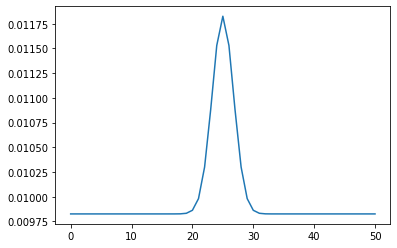

In [36]:
plt.plot(eta_0)

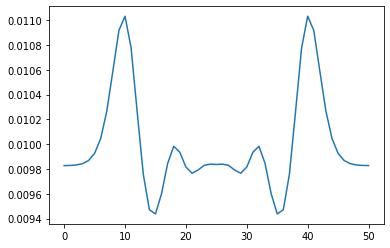

In [47]:
plt.plot(eta_1)

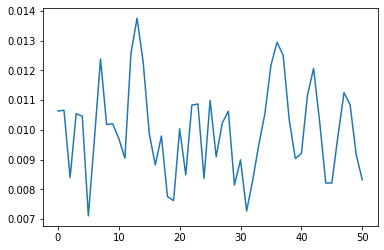

In [46]:
plt.plot(eta_4)

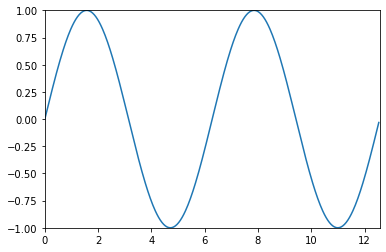

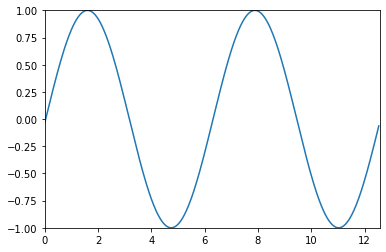

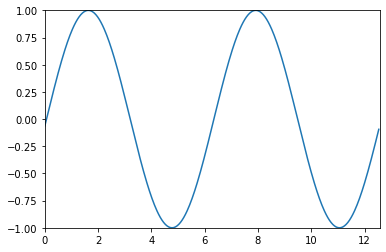

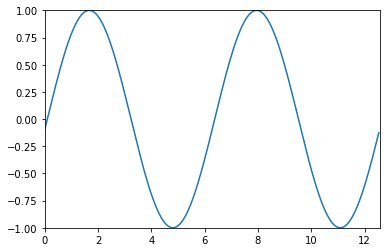

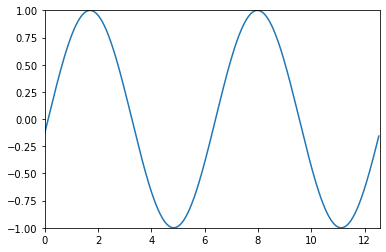

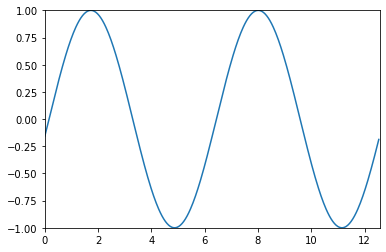

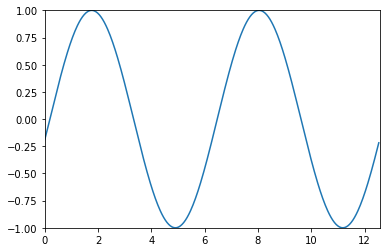

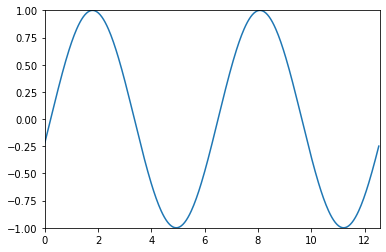

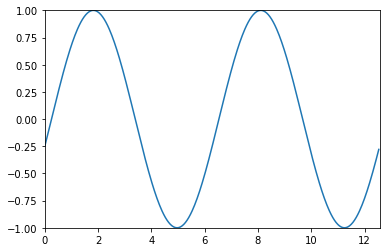

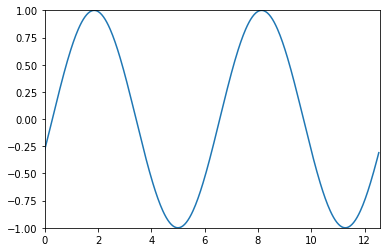

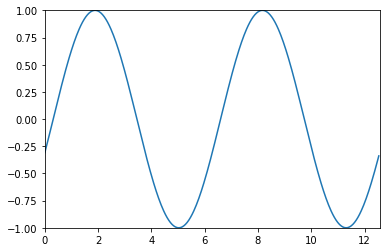

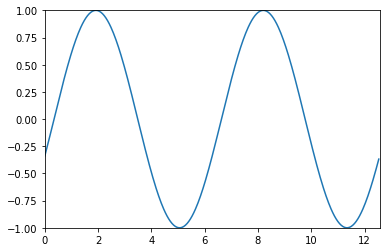

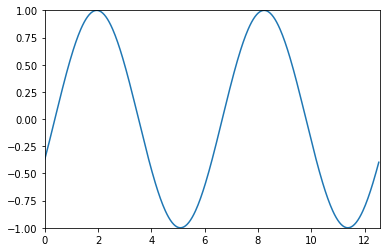

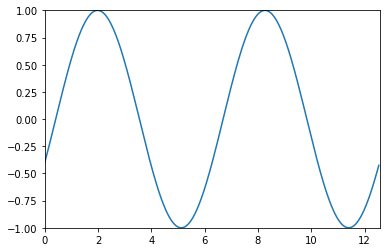

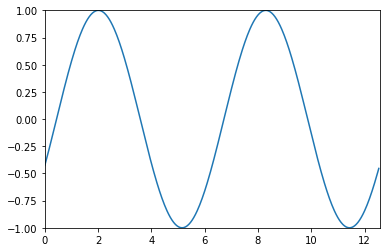

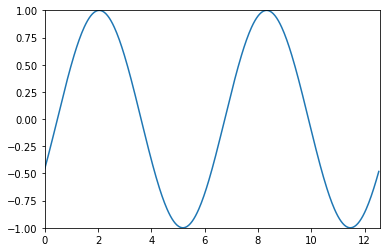

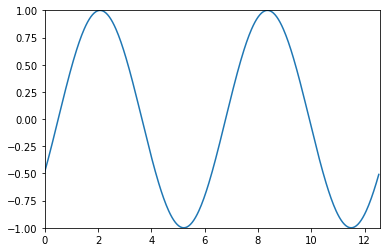

KeyboardInterrupt: 

In [40]:
"""
from numpy import arange, pi, sin
from pylab import clf, plot, xlim, ylim, show, pause
t = arange(0, 4*pi, pi/100)# t coordinate
x = arange(0, 4*pi, pi/100)# x coordinate
for tval in t:
    clf()# clear the plot
    plot(x, sin(x-tval))# plot the current sin curve
    xlim([0, 4*pi])# set the x boundaries constant
    ylim([-1, 1])# and the y boundaries
    #draw()????
    pause(0.01)#pause to allow a smooth animation
"""    

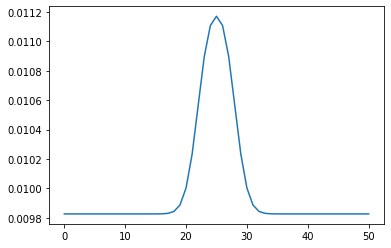

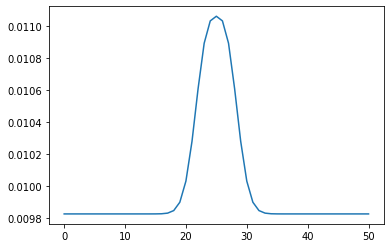

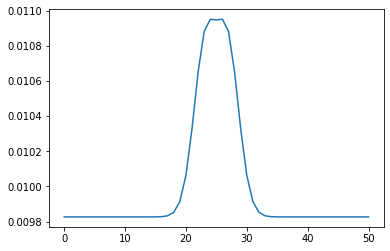

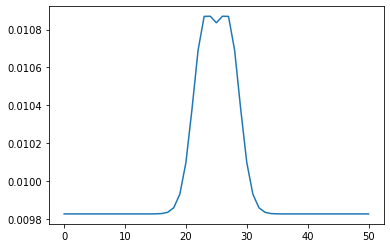

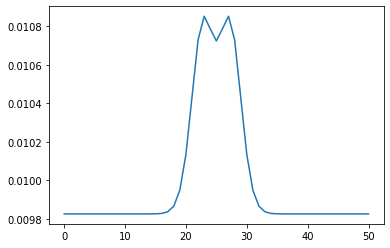

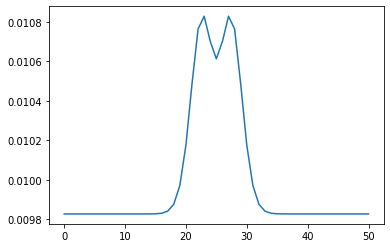

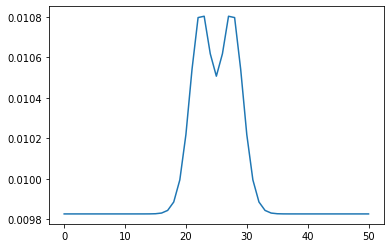

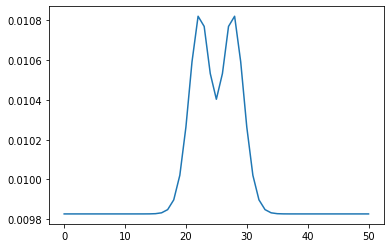

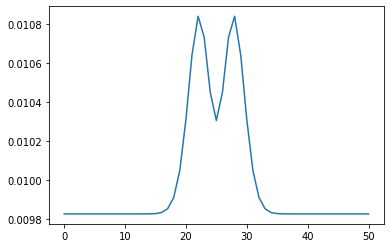

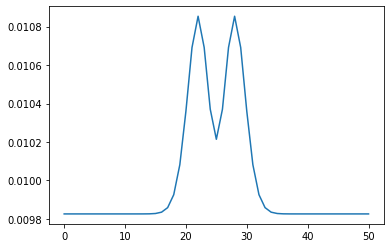

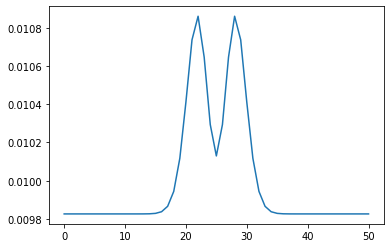

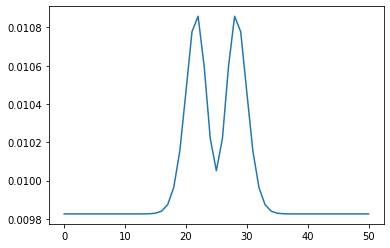

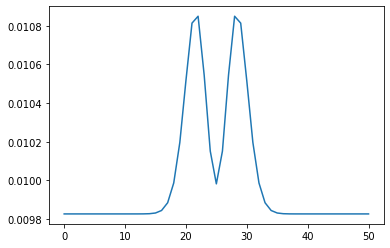

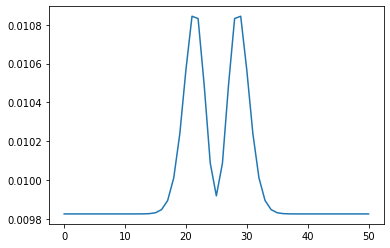

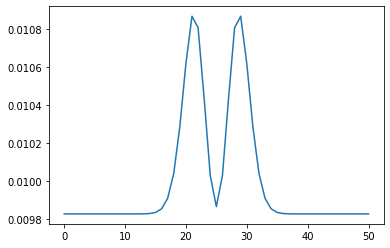

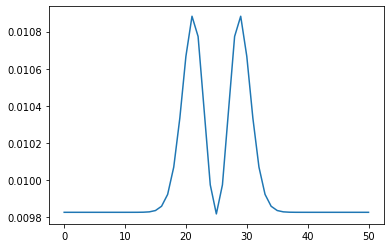

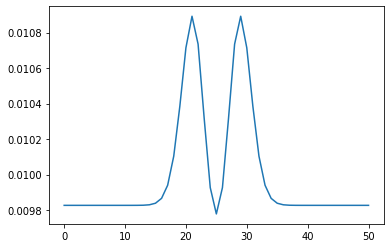

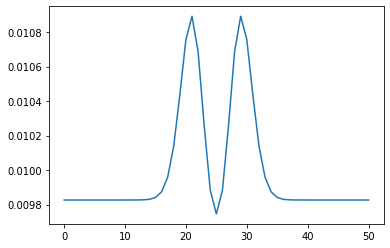

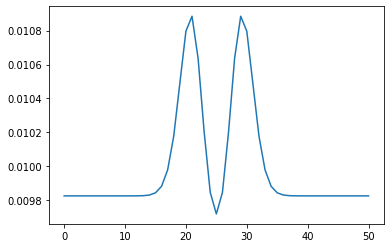

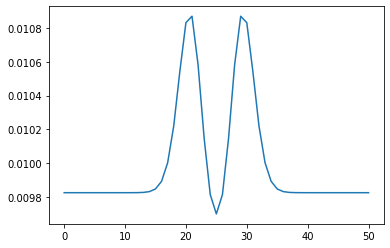

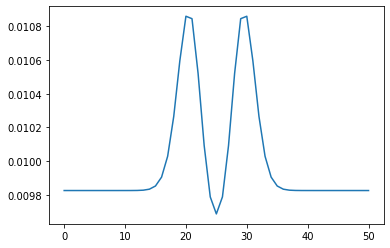

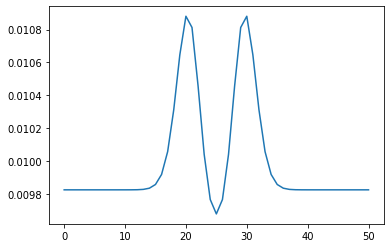

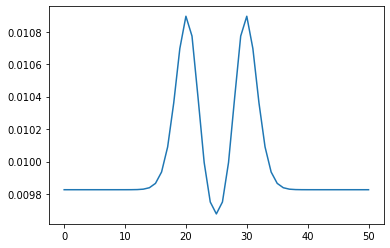

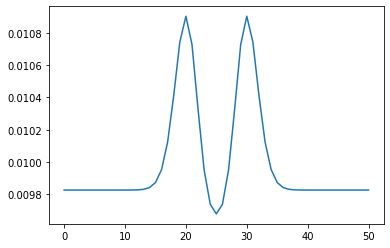

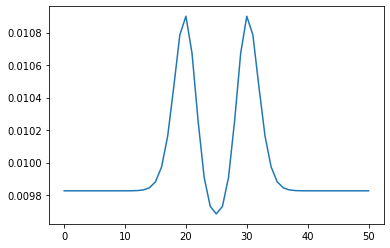

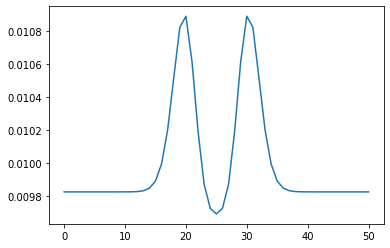

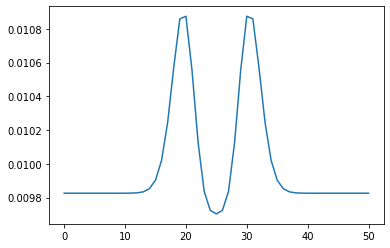

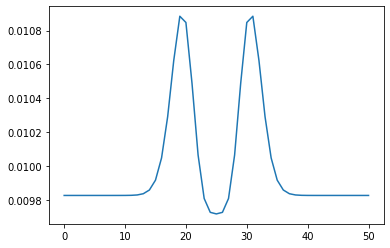

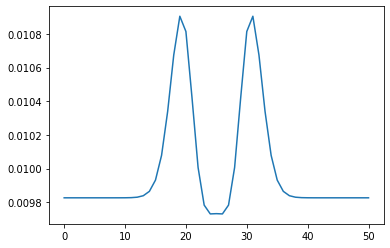

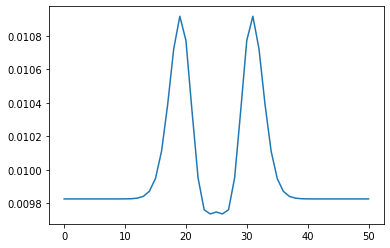

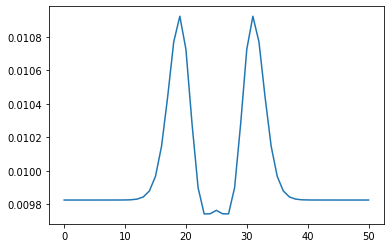

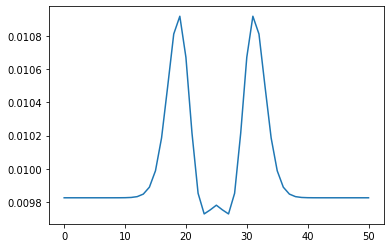

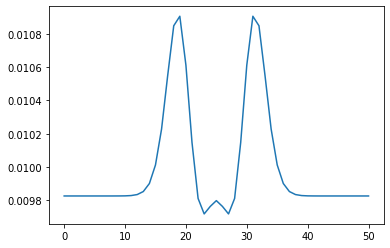

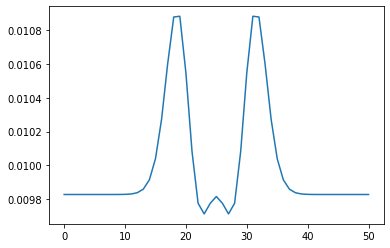

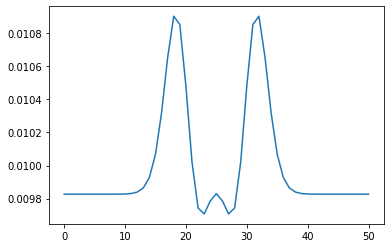

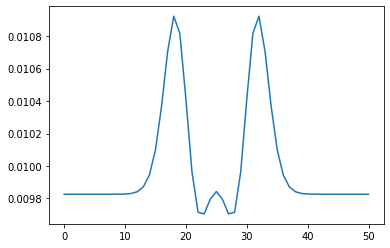

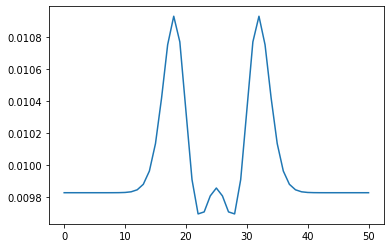

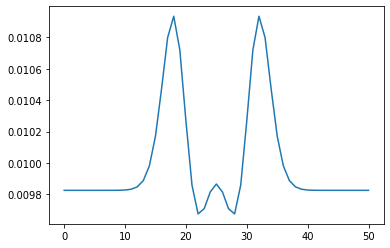

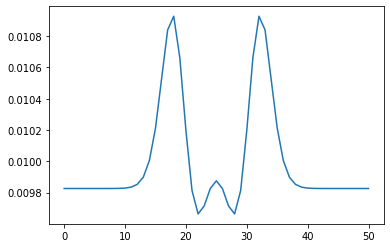

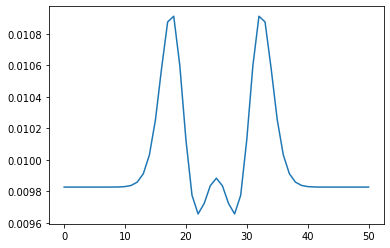

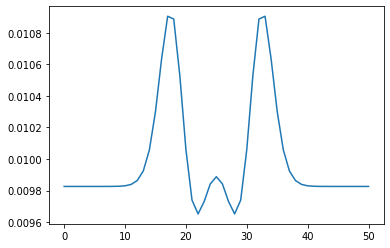

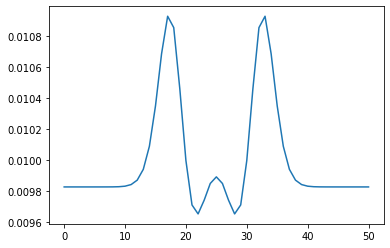

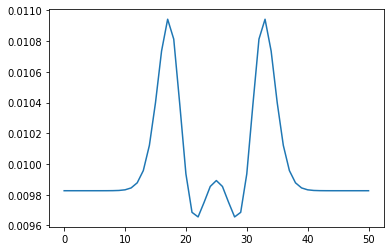

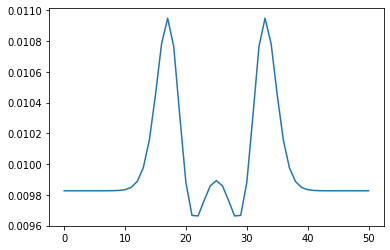

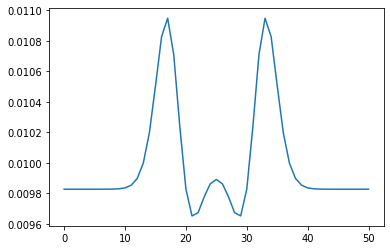

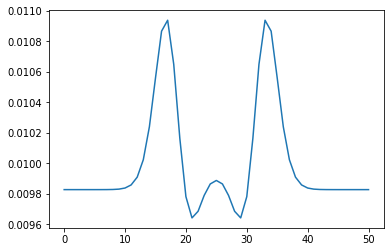

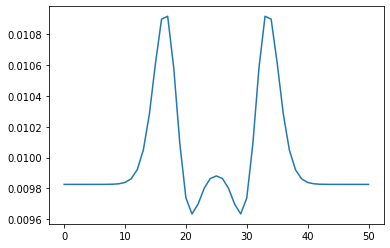

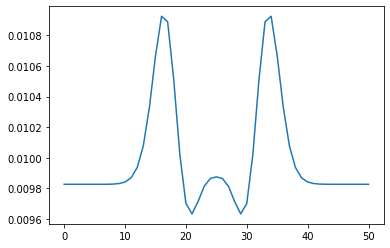

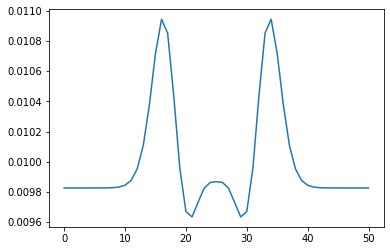

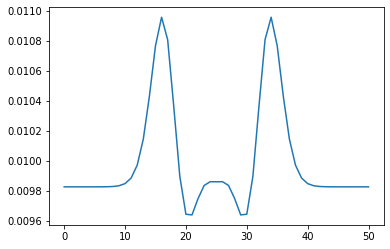

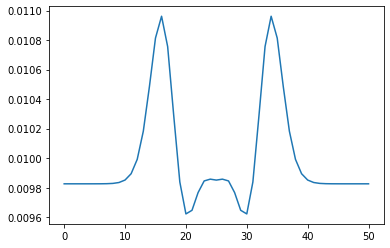

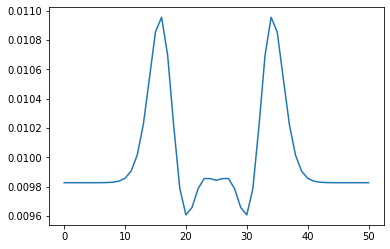

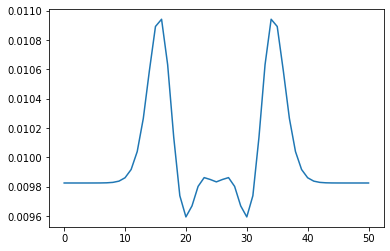

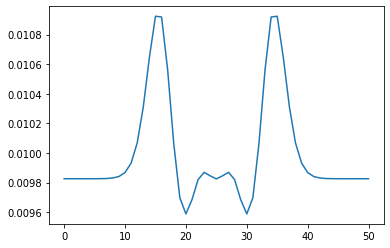

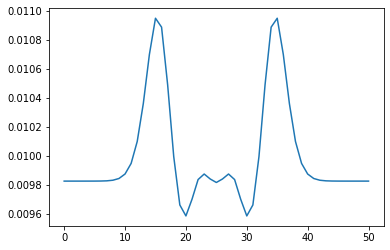

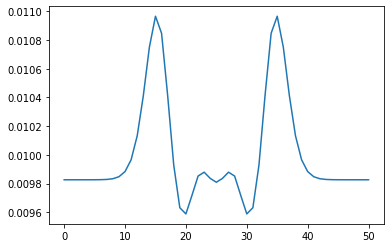

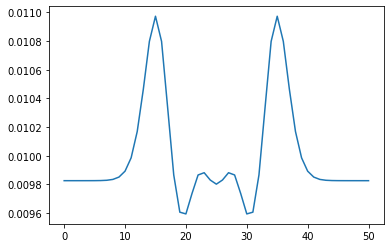

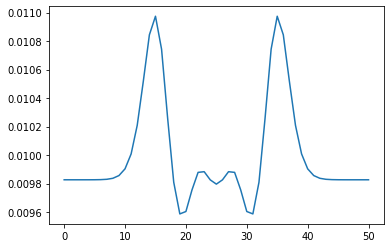

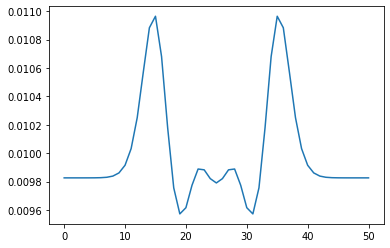

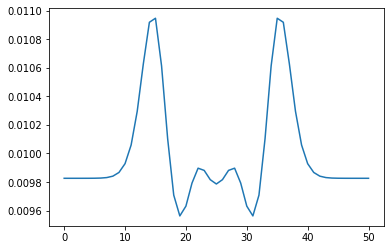

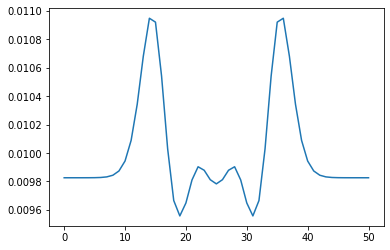

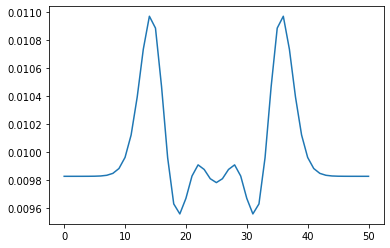

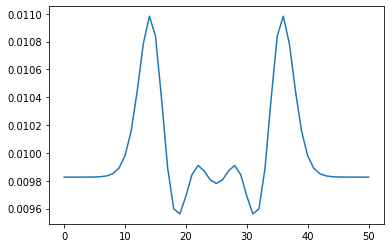

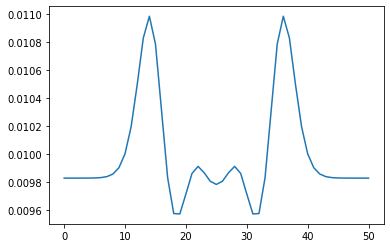

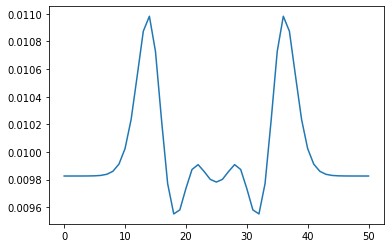

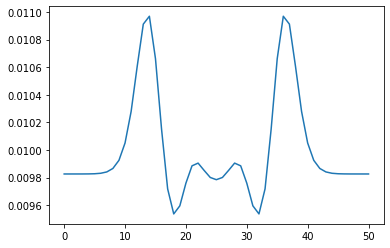

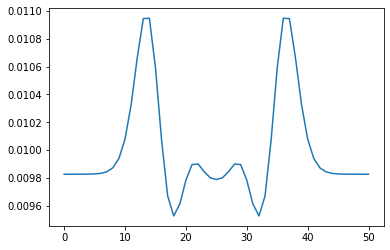

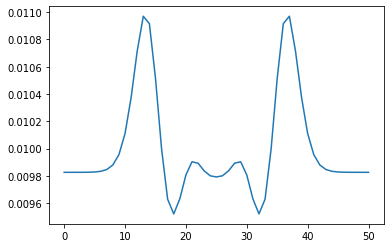

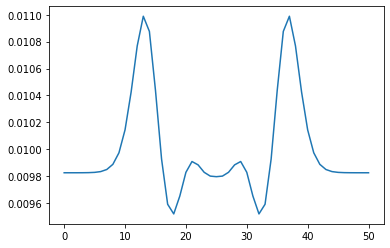

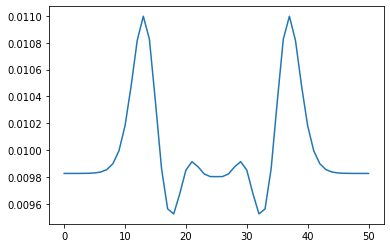

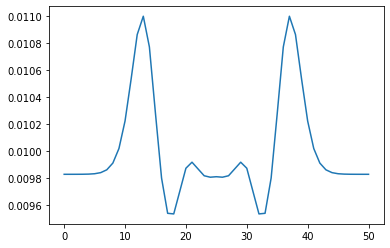

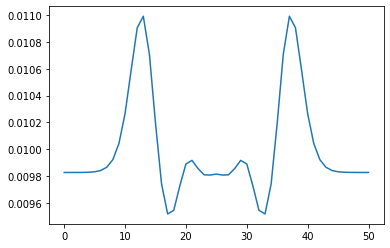

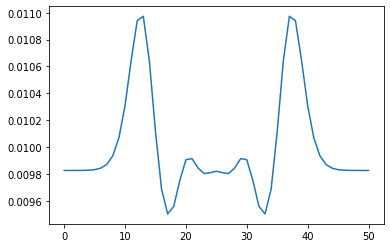

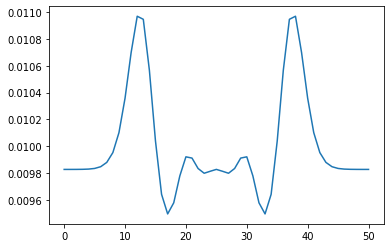

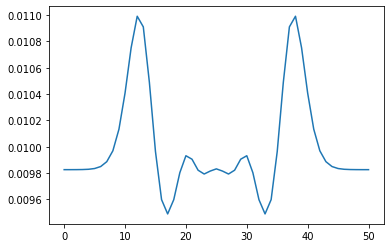

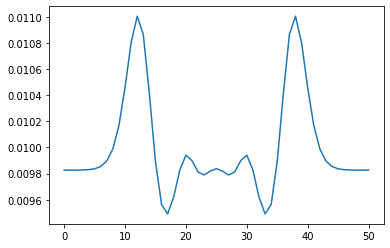

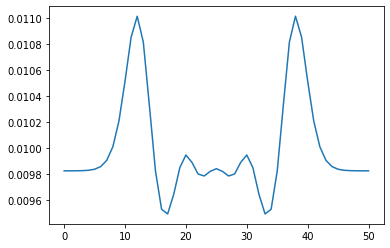

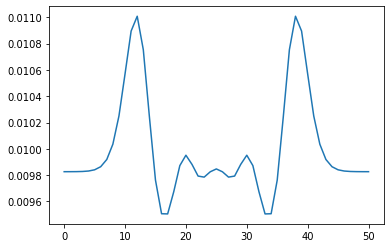

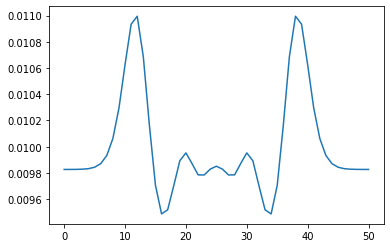

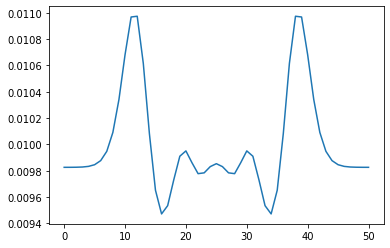

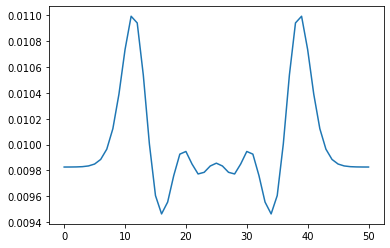

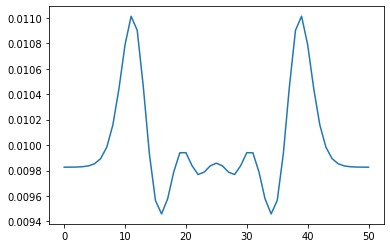

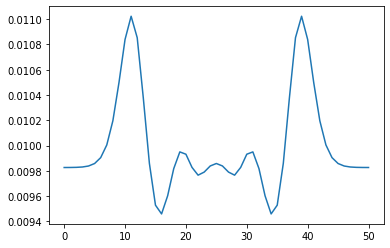

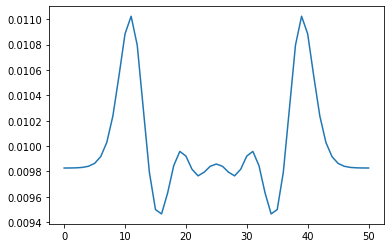

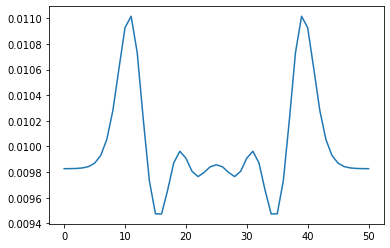

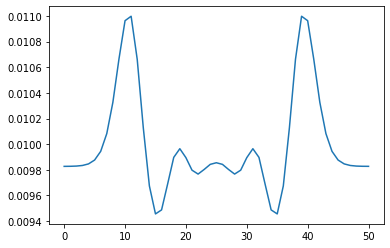

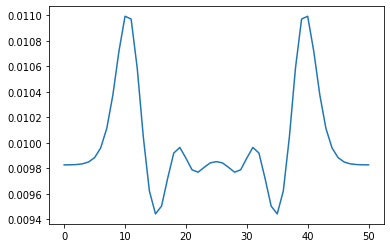

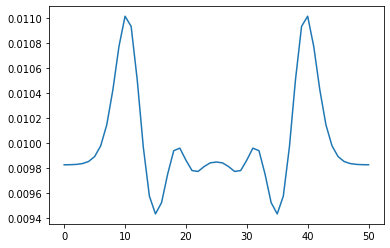

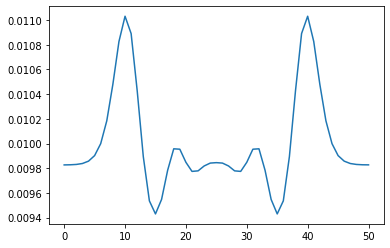

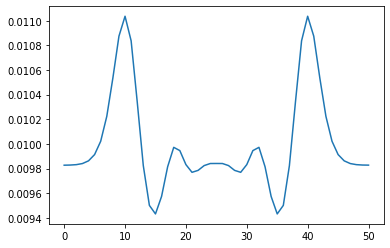

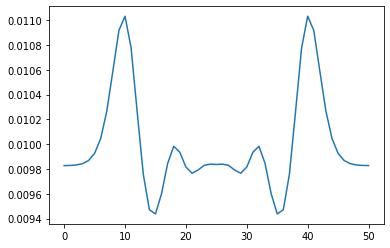

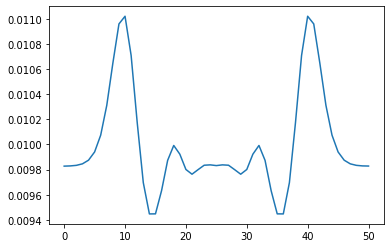

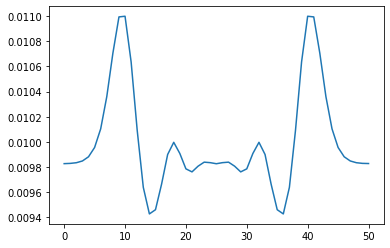

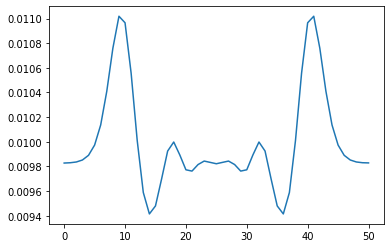

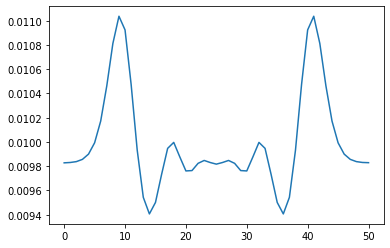

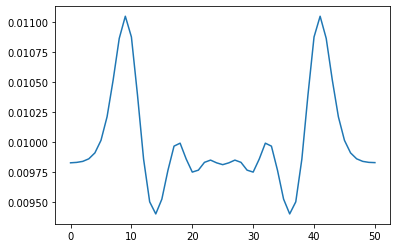

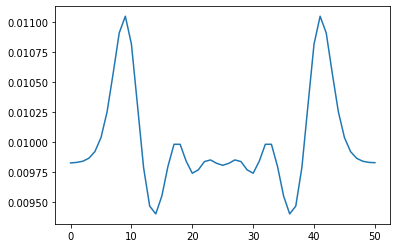

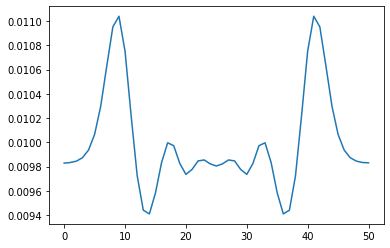

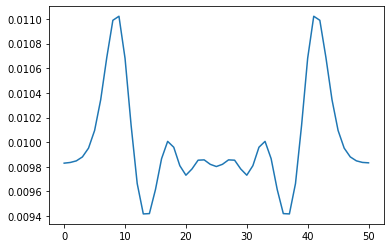

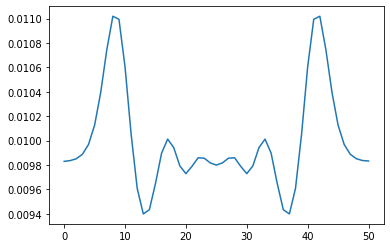

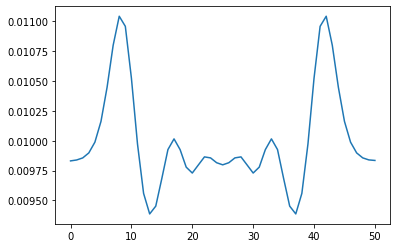

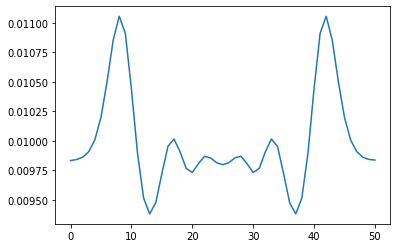

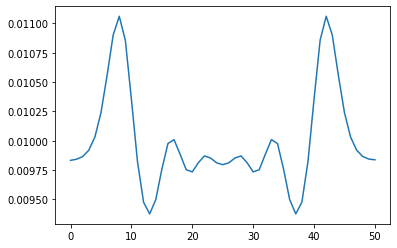

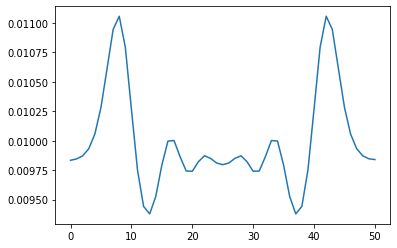

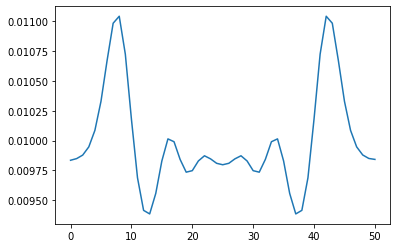

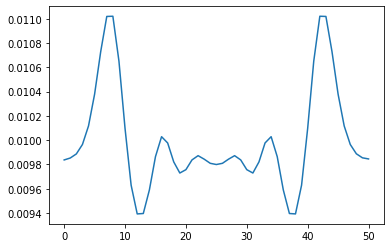

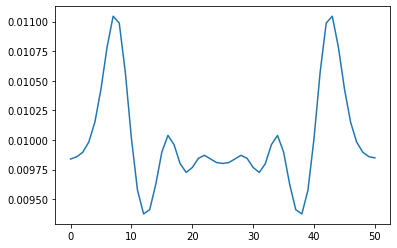

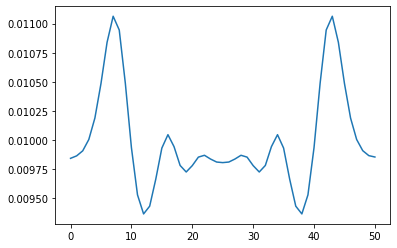

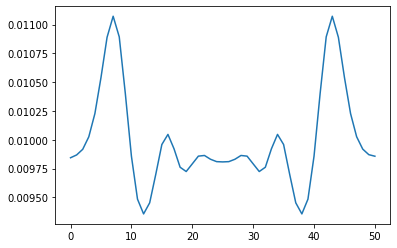

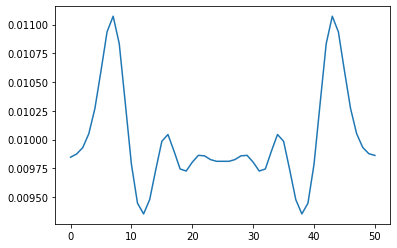

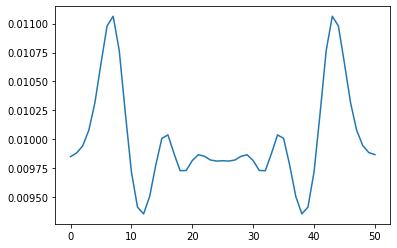

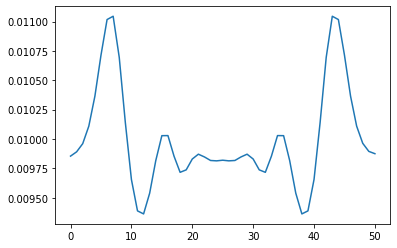

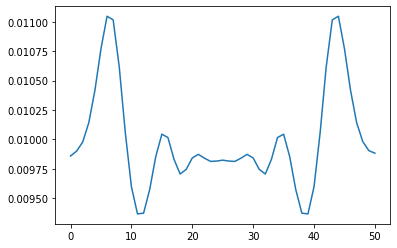

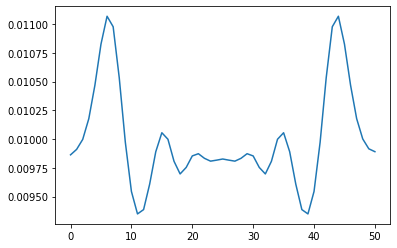

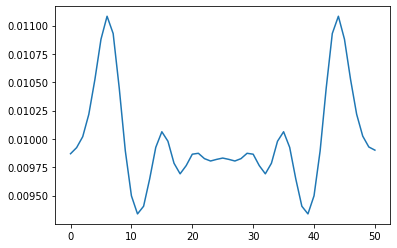

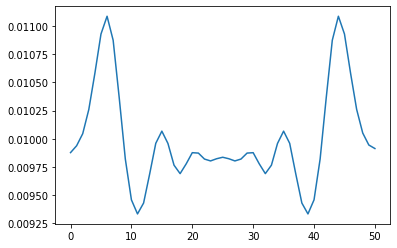

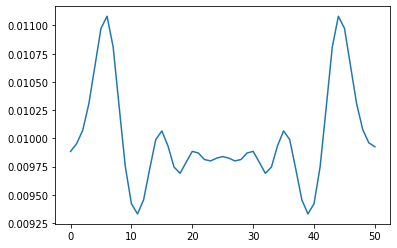

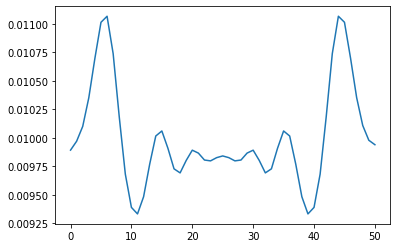

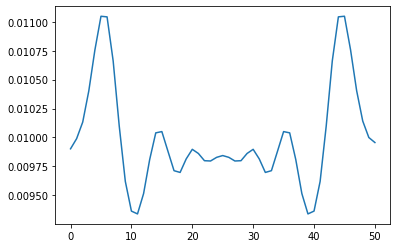

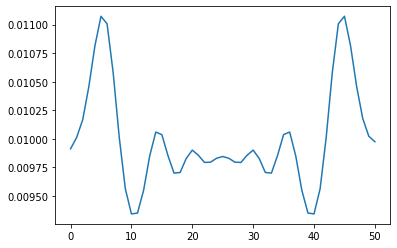

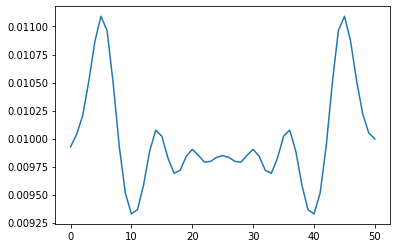

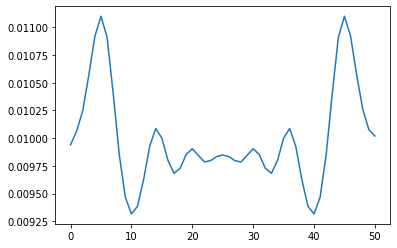

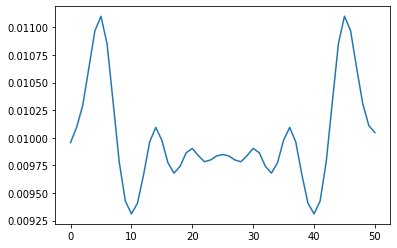

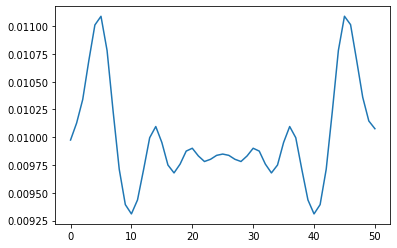

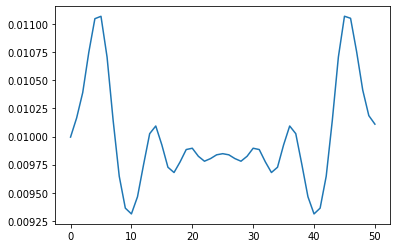

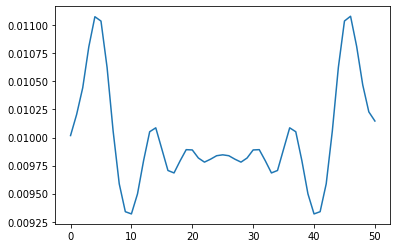

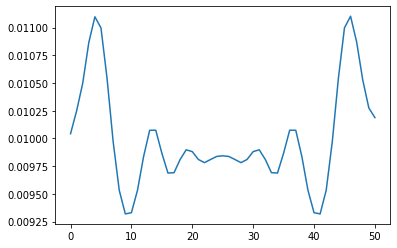

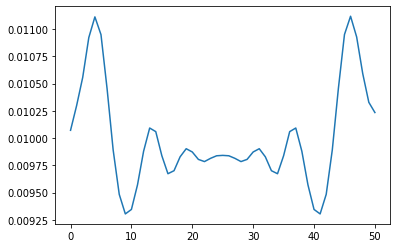

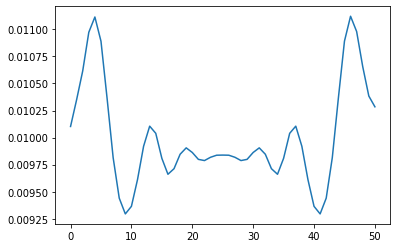

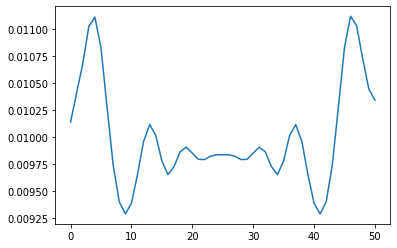

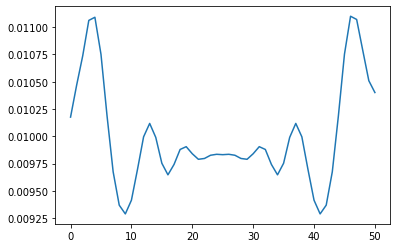

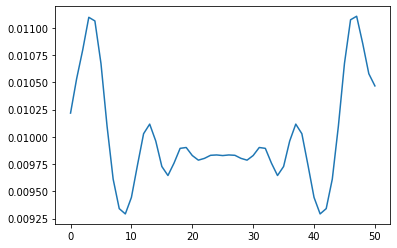

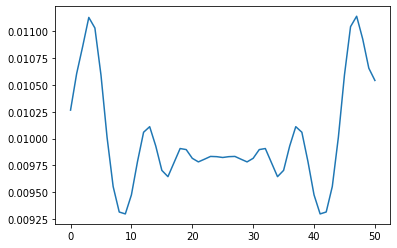

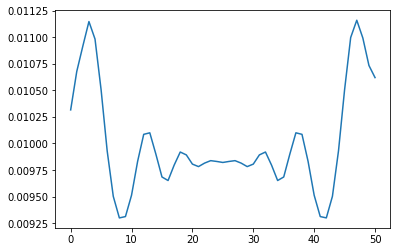

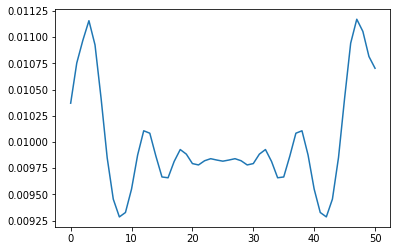

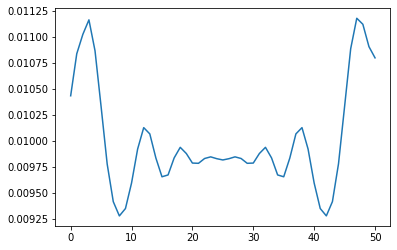

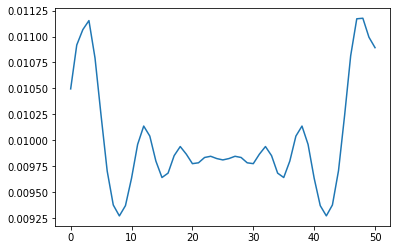

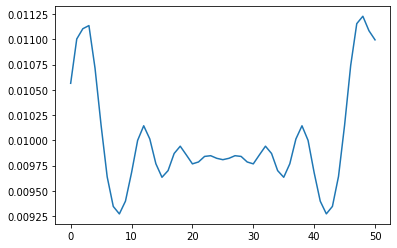

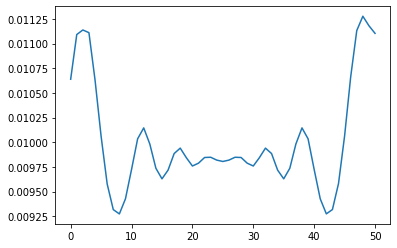

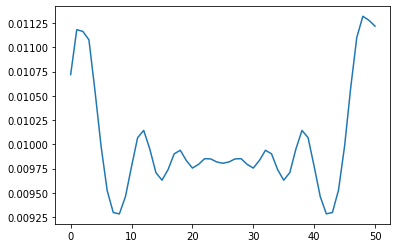

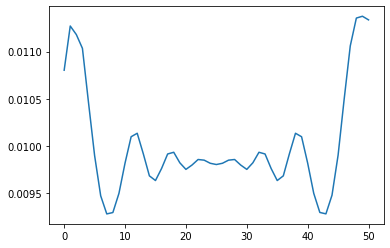

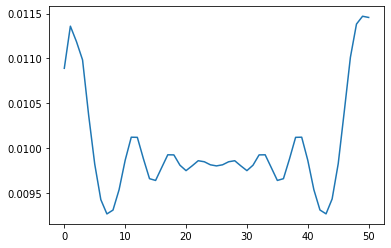

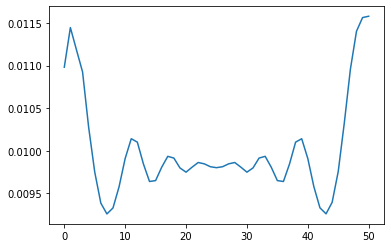

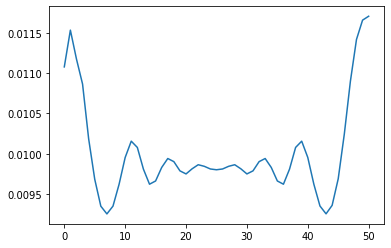

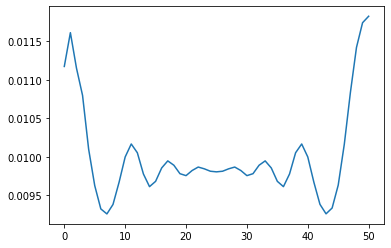

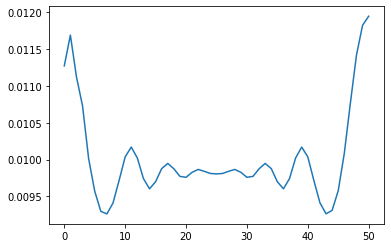

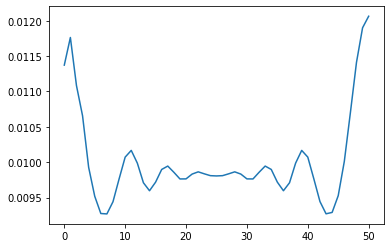

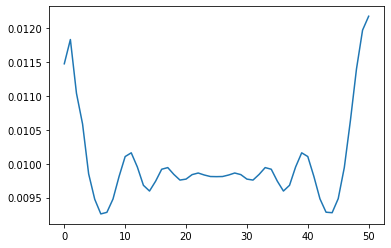

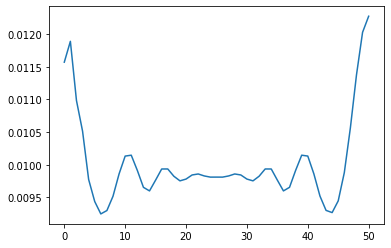

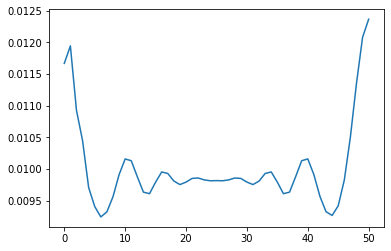

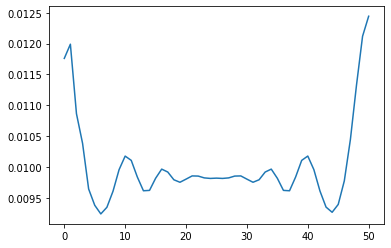

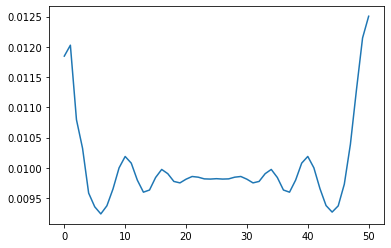

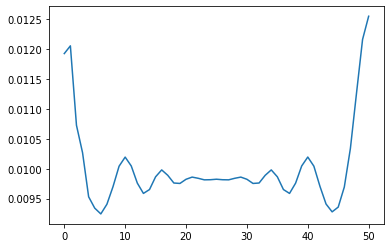

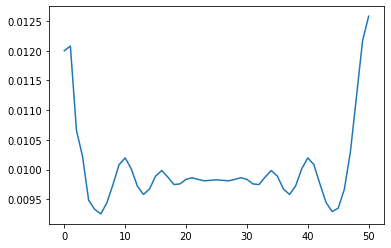

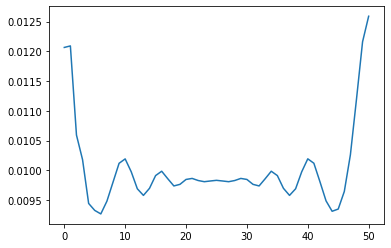

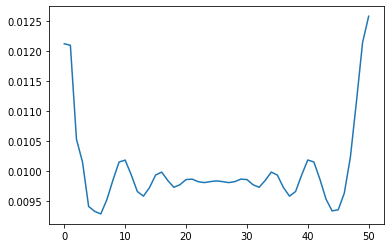

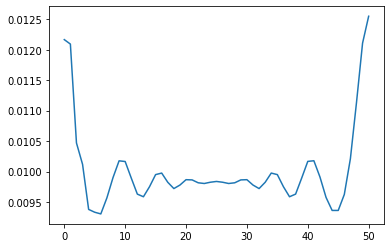

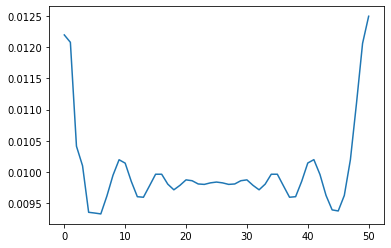

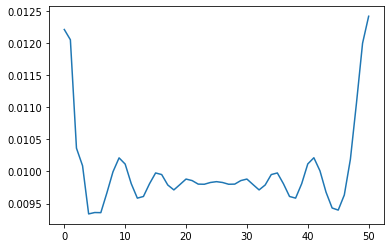

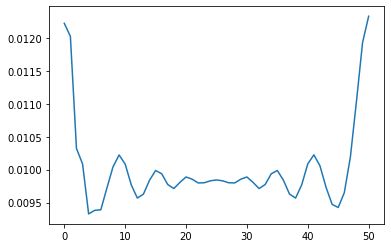

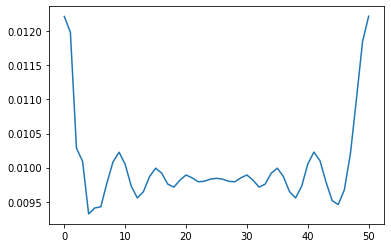

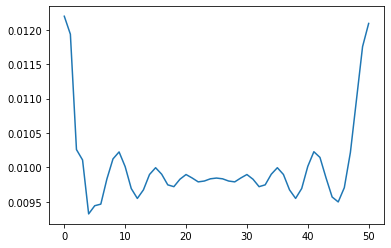

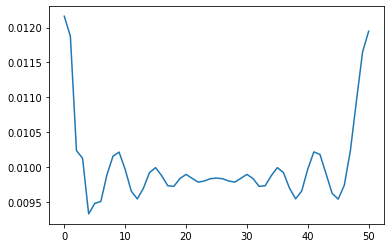

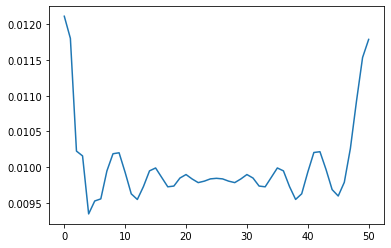

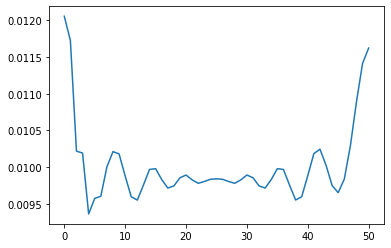

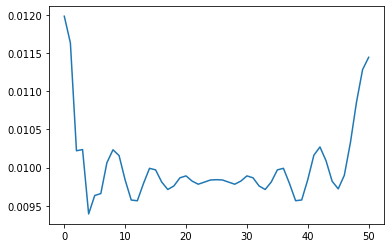

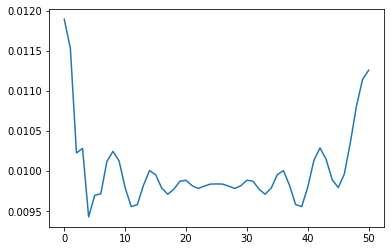

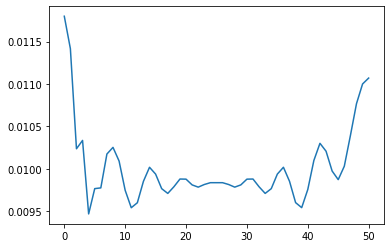

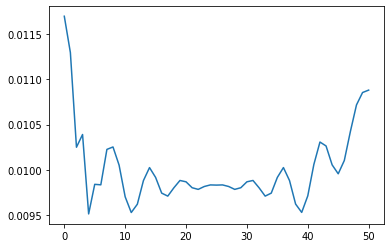

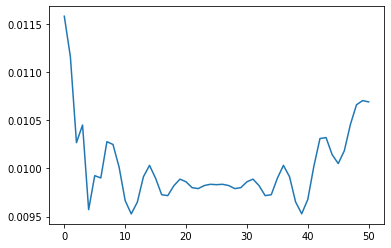

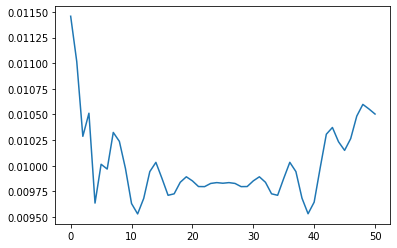

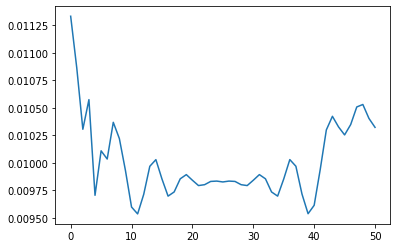

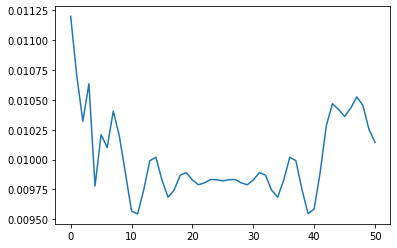

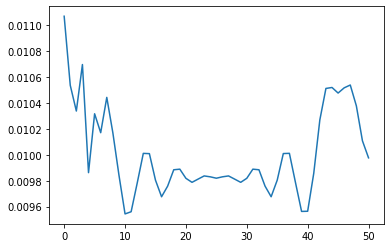

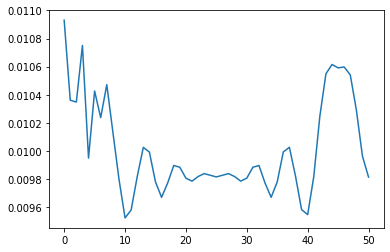

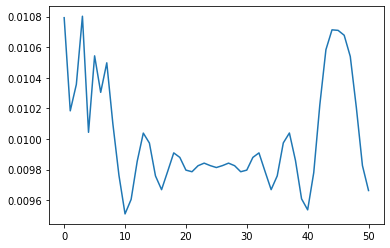

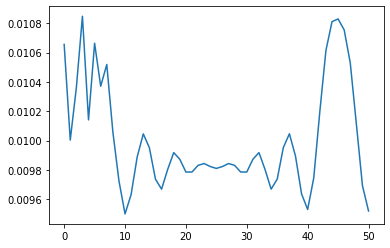

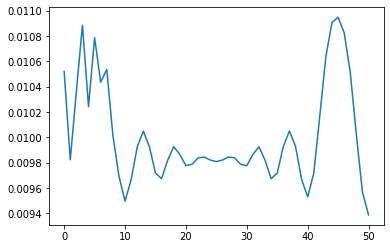

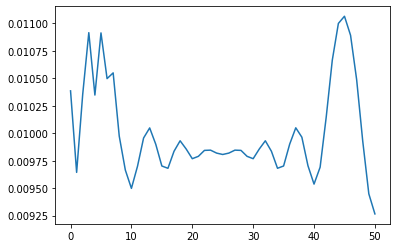

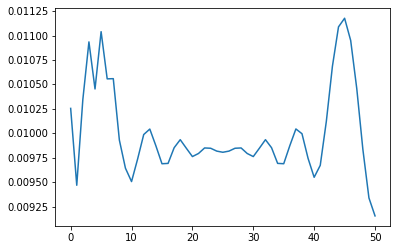

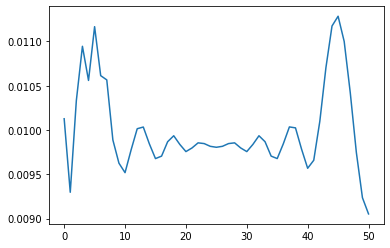

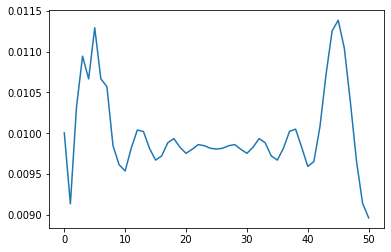

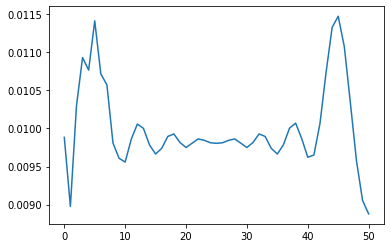

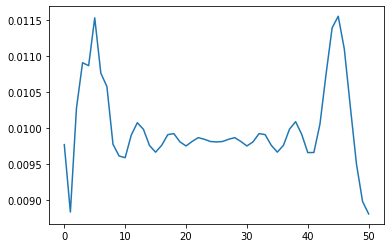

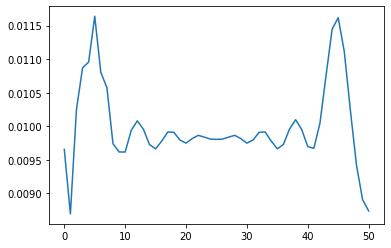

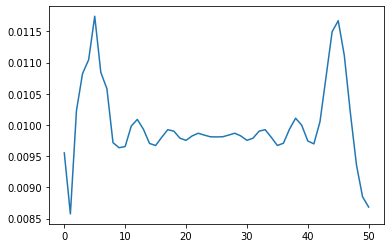

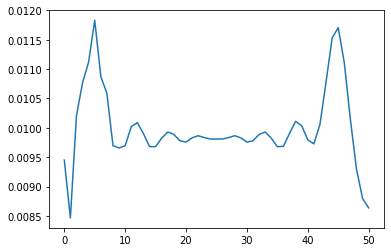

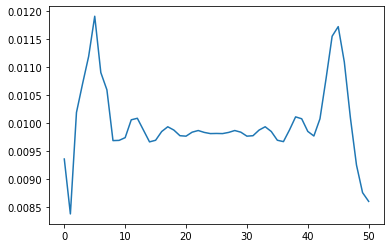

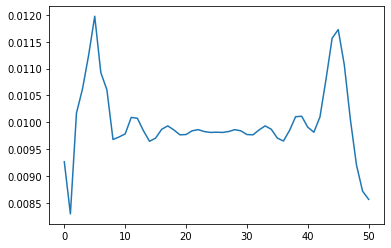

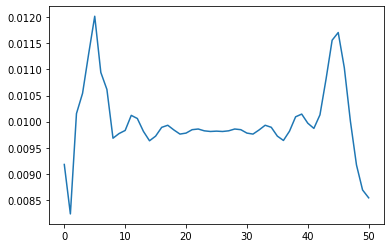

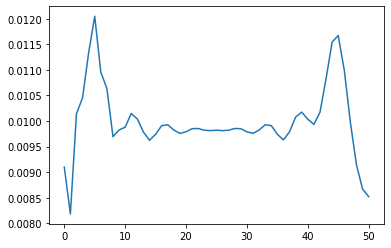

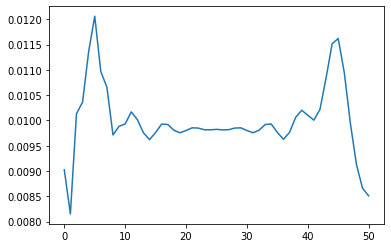

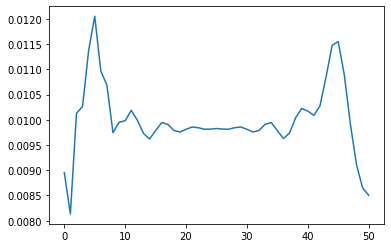

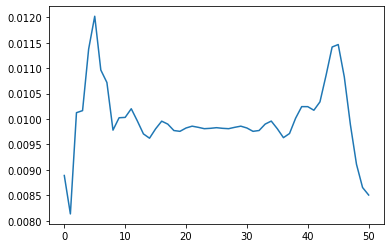

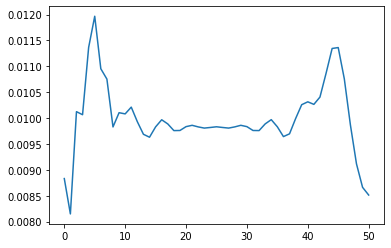

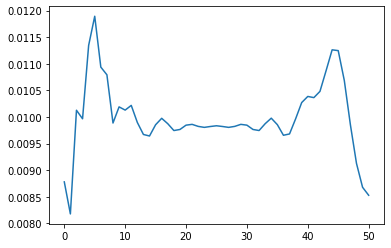

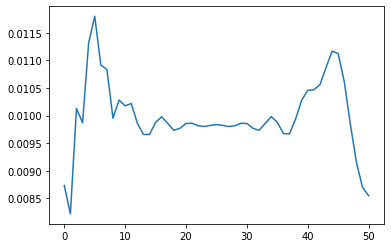

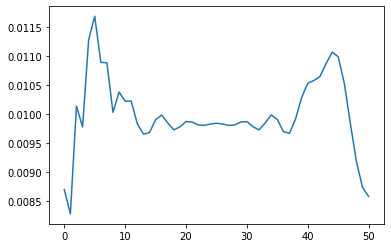

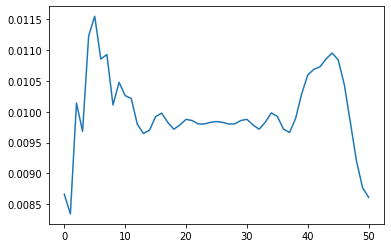

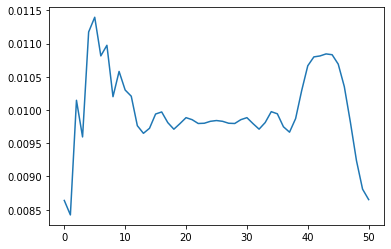

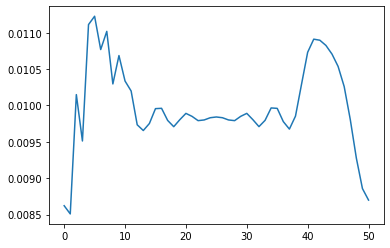

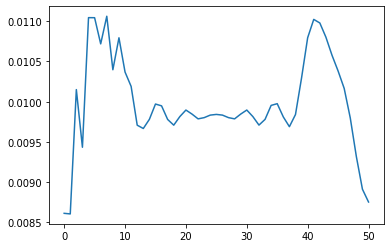

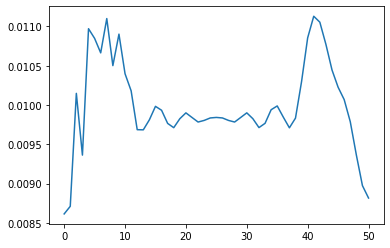

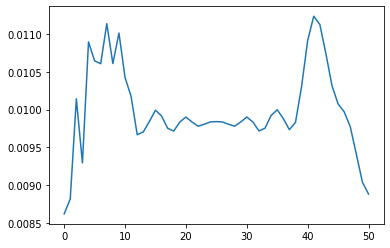

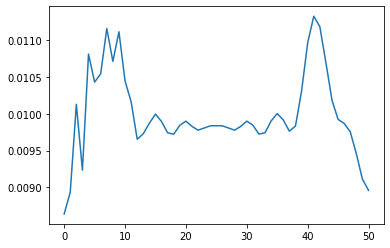

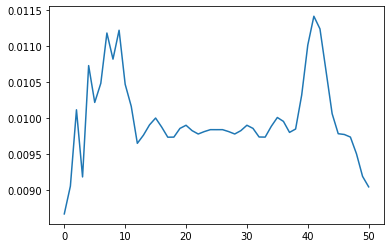

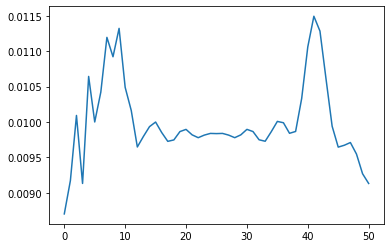

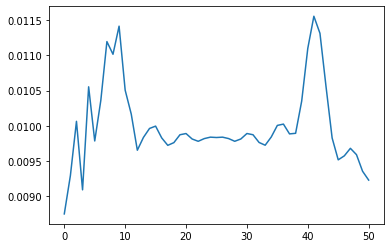

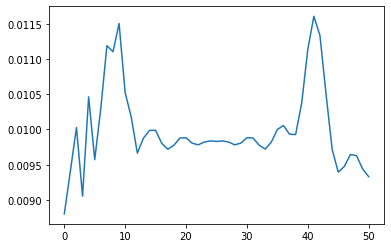

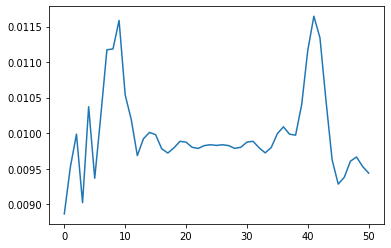

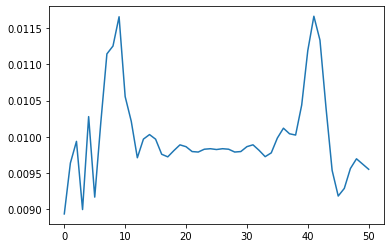

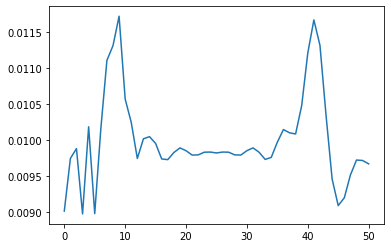

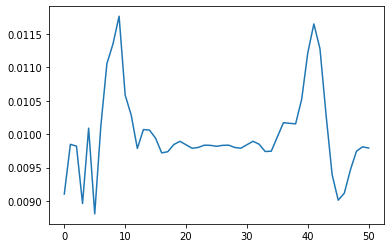

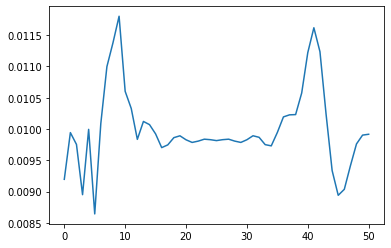

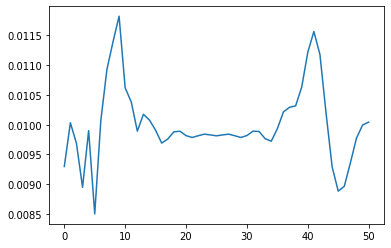

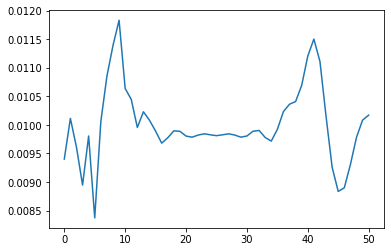

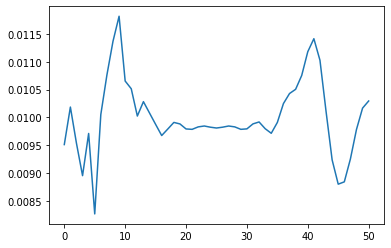

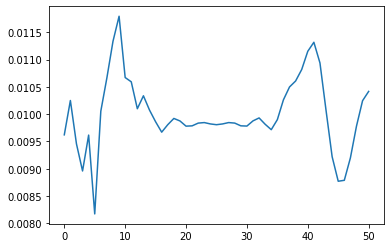

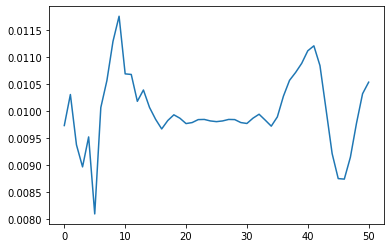

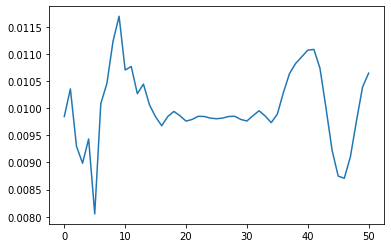

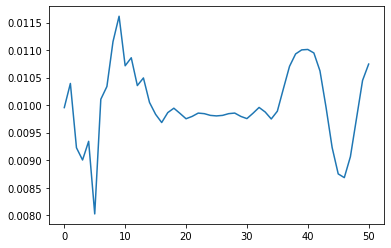

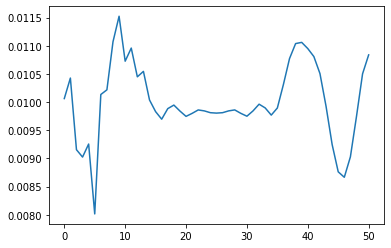

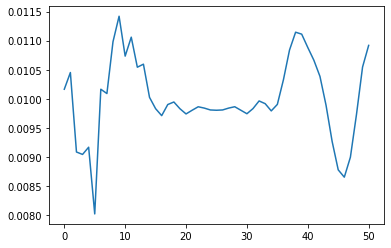

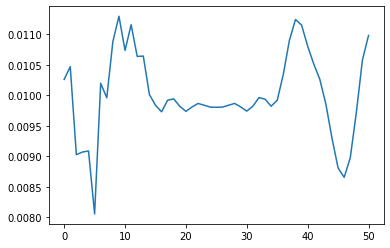

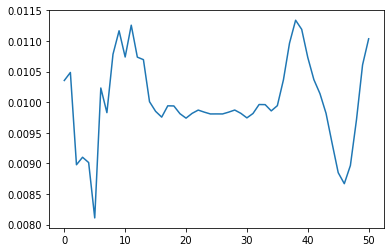

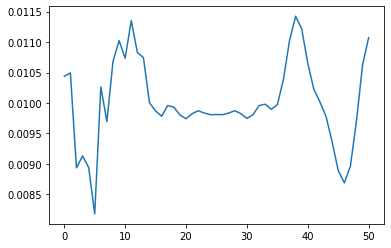

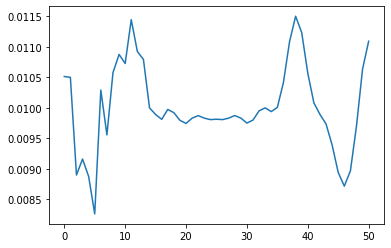

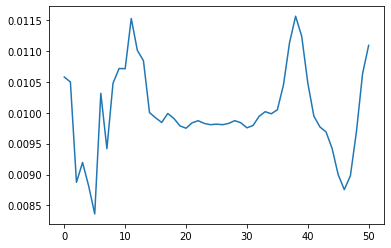

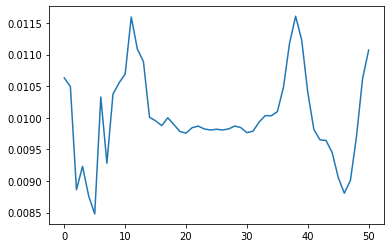

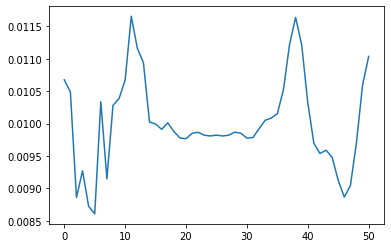

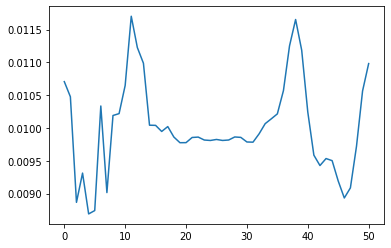

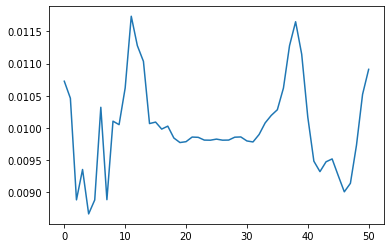

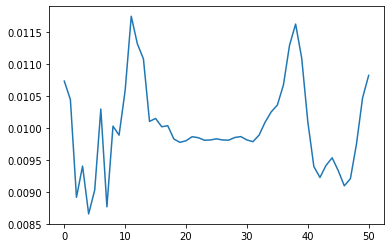

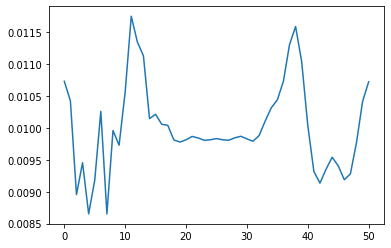

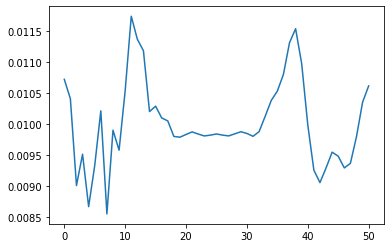

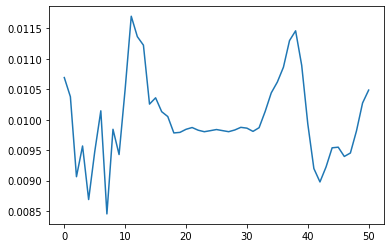

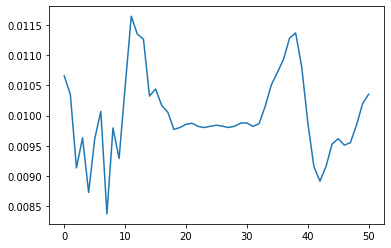

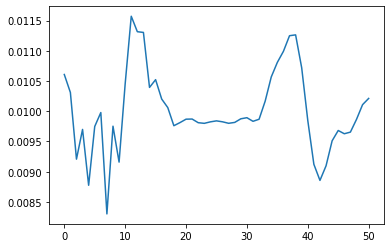

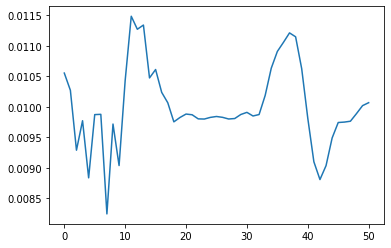

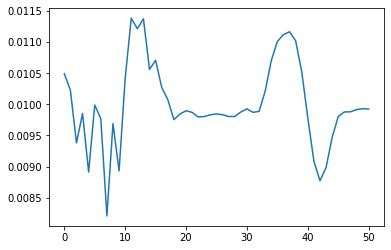

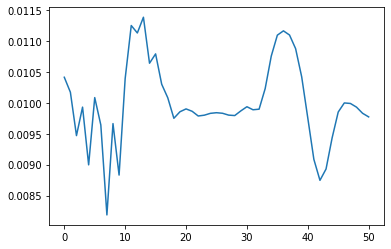

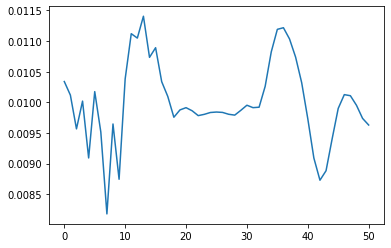

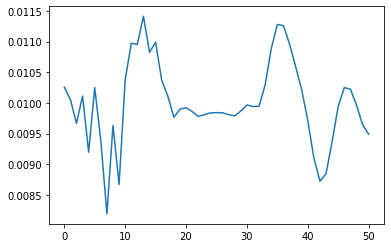

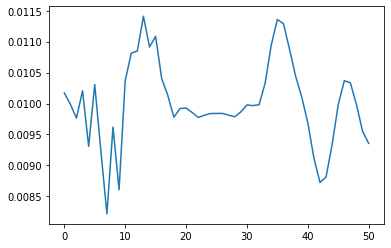

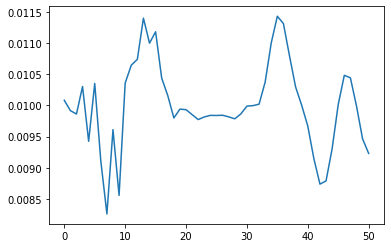

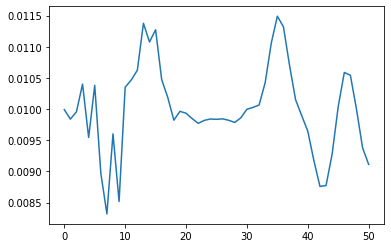

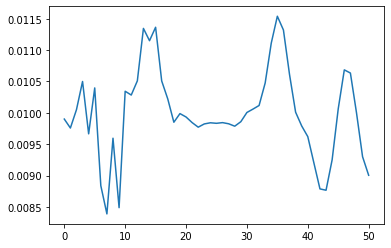

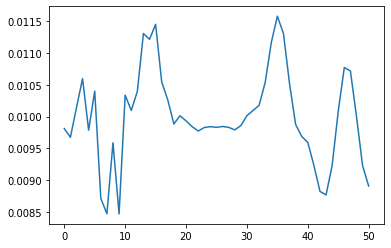

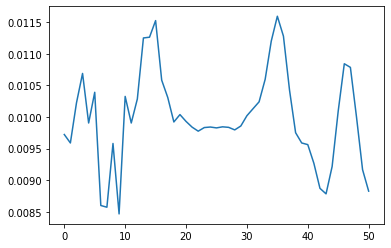

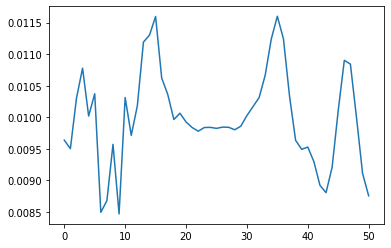

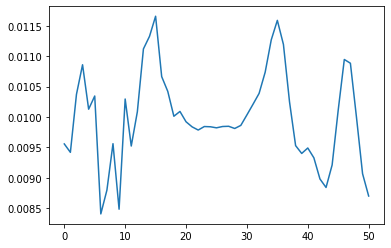

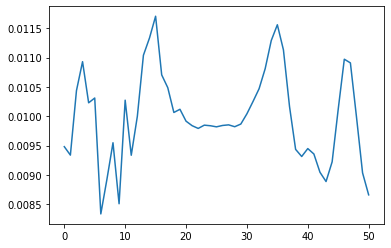

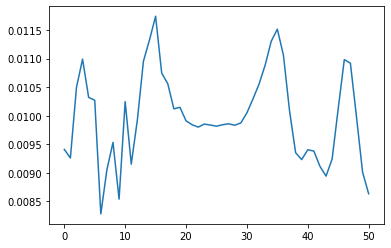

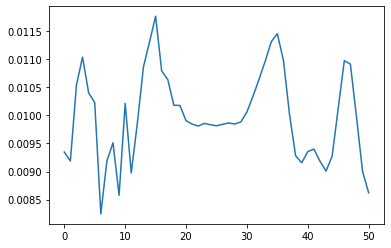

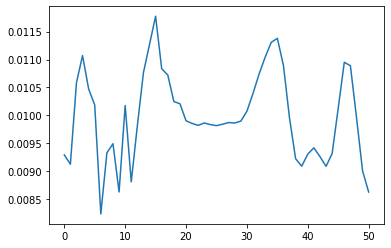

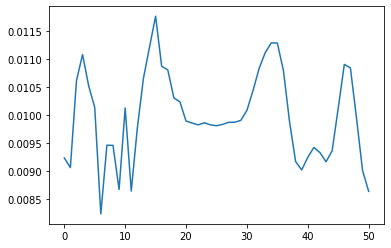

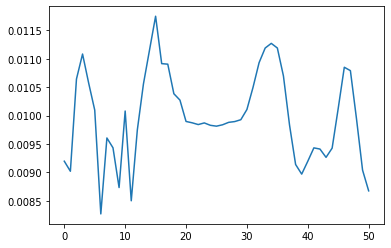

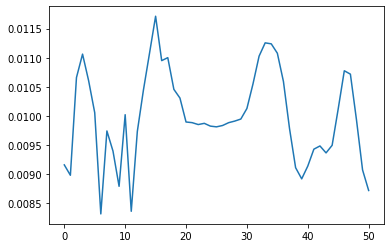

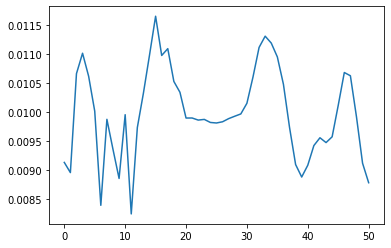

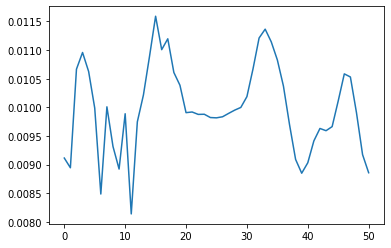

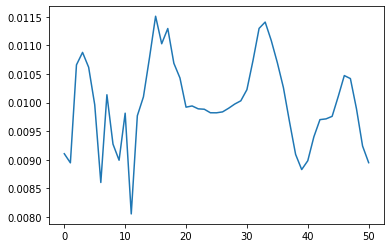

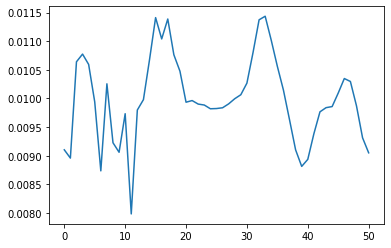

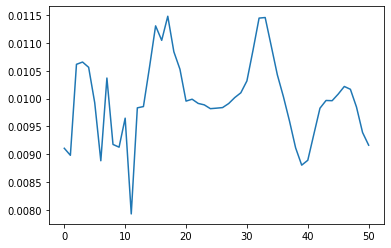

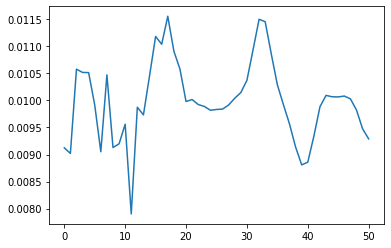

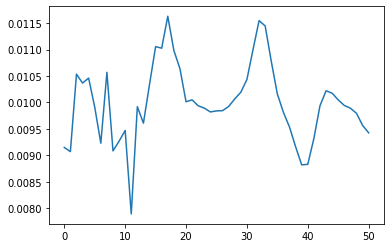

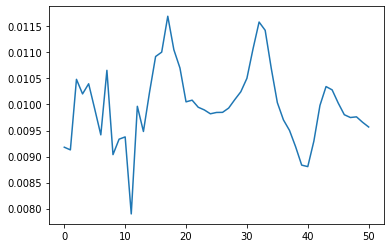

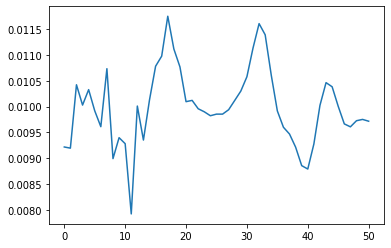

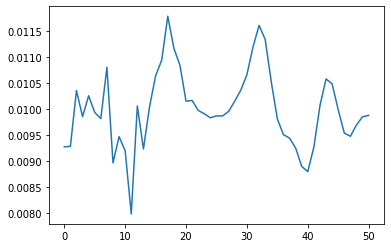

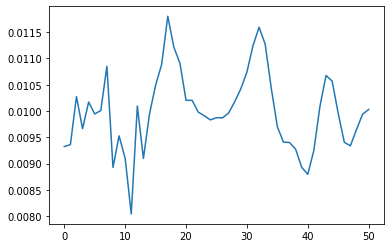

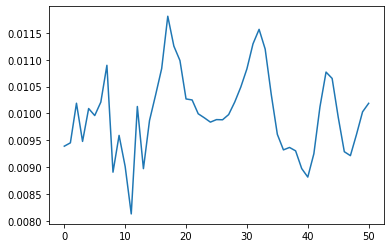

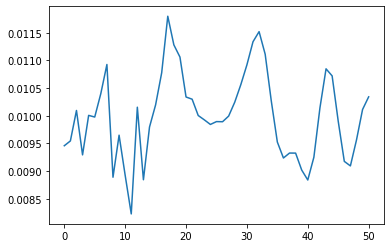

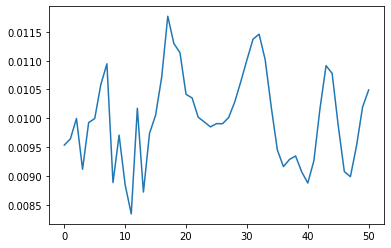

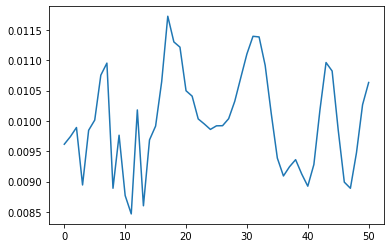

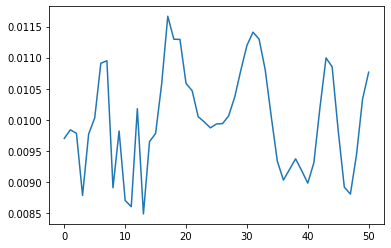

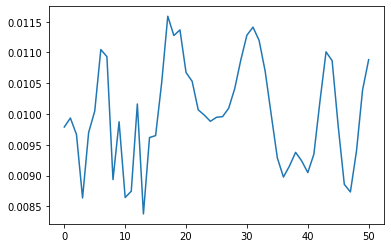

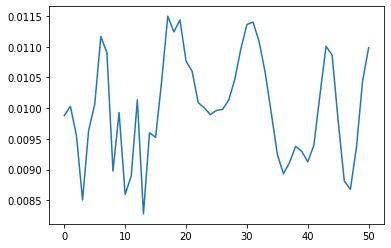

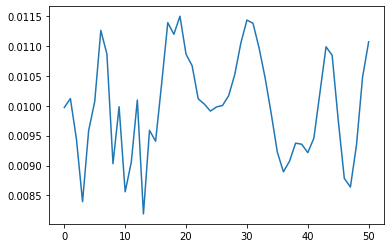

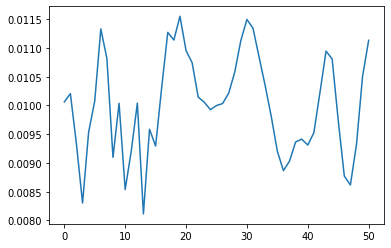

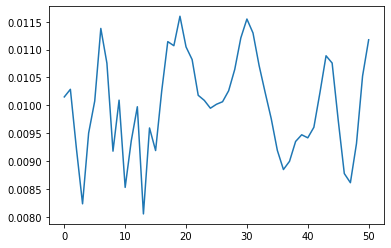

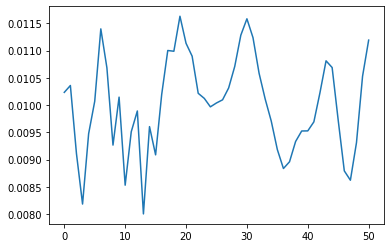

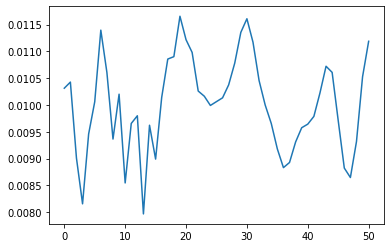

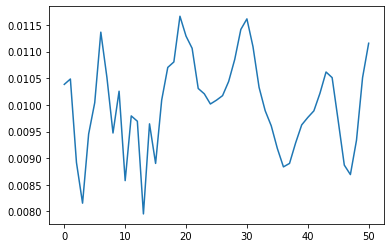

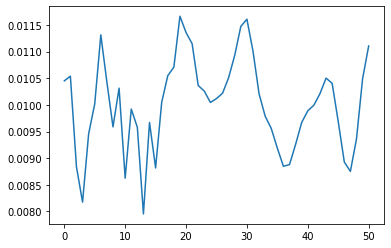

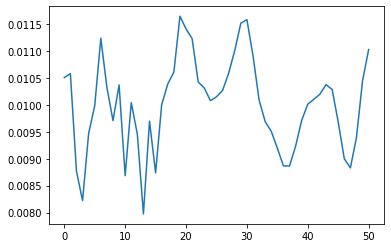

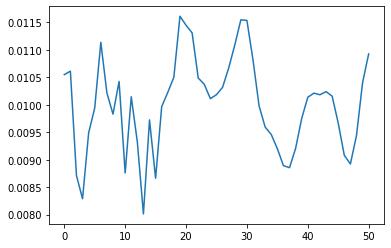

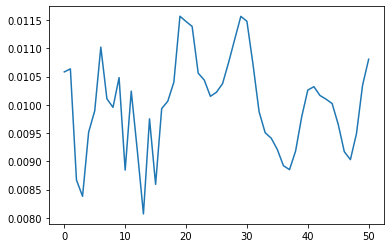

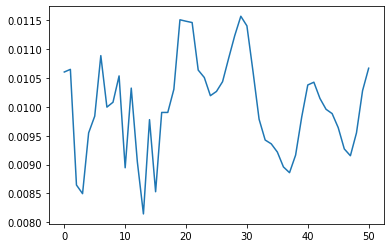

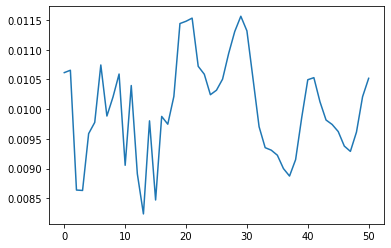

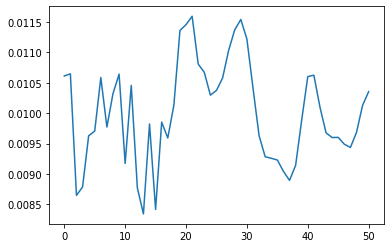

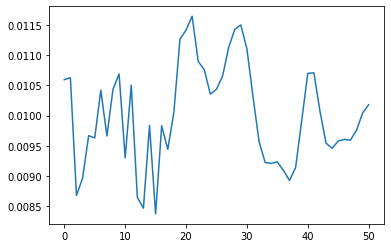

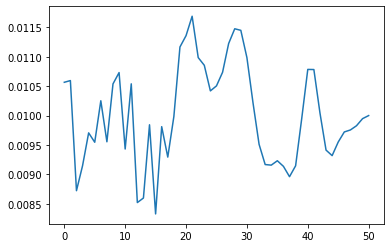

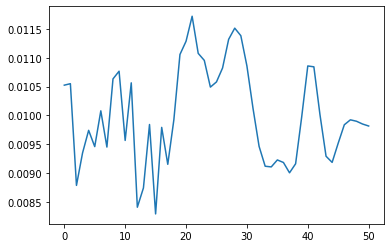

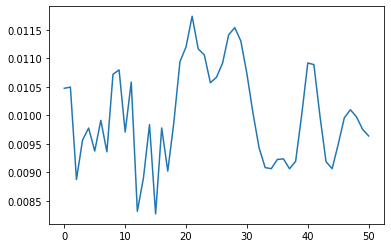

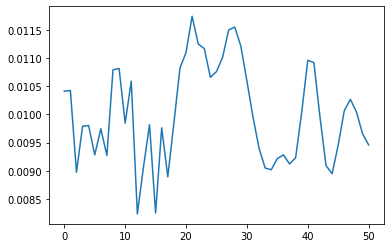

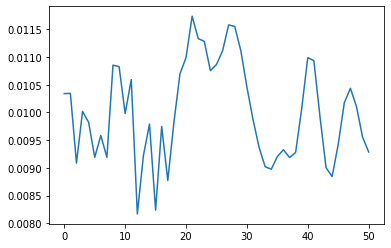

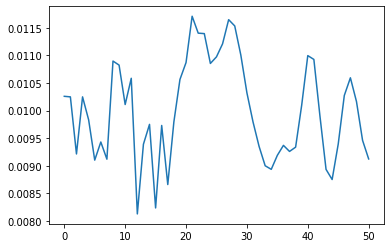

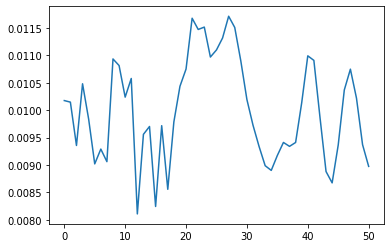

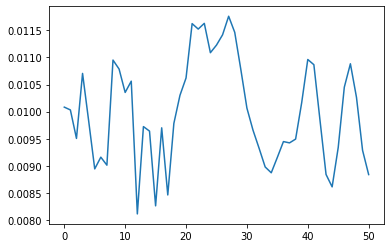

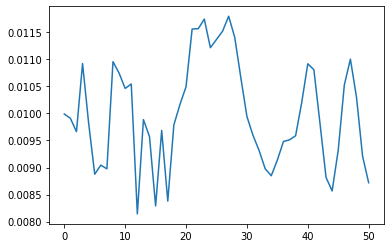

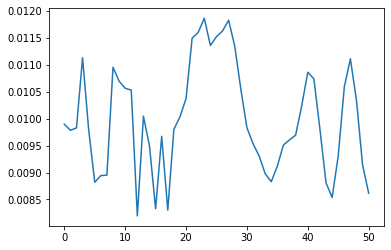

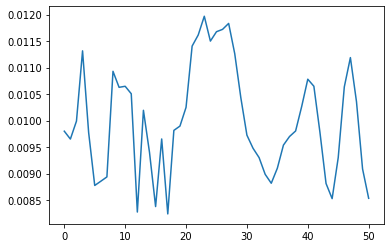

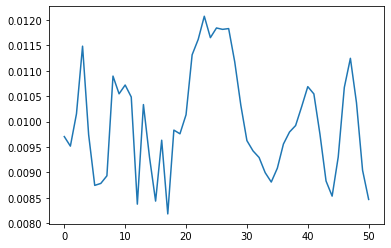

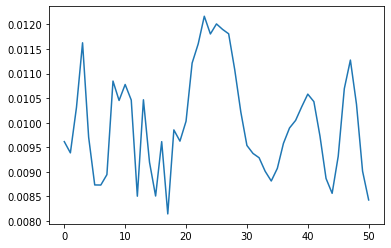

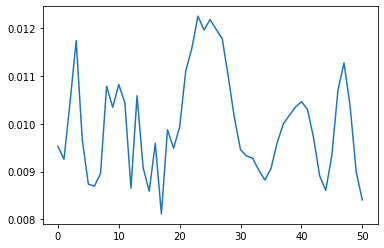

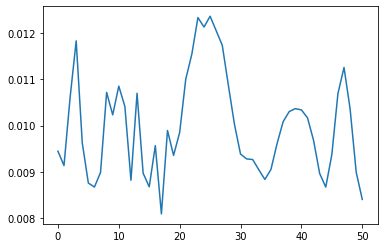

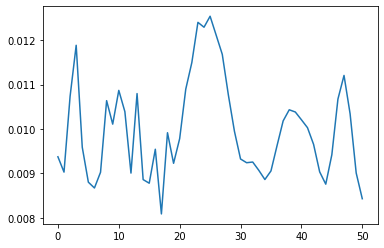

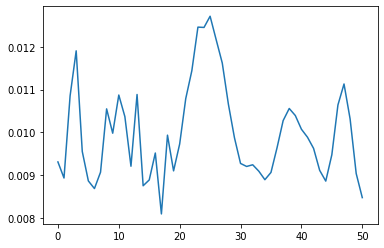

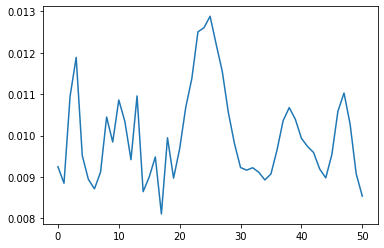

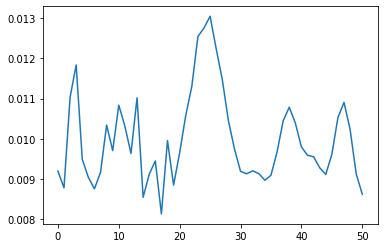

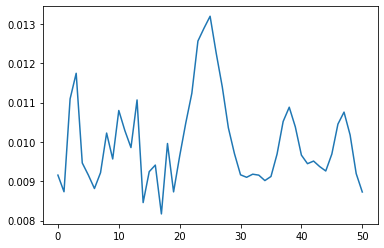

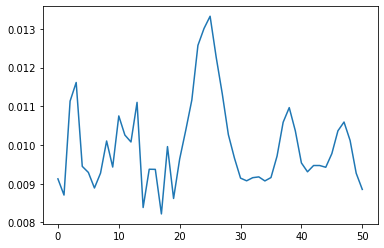

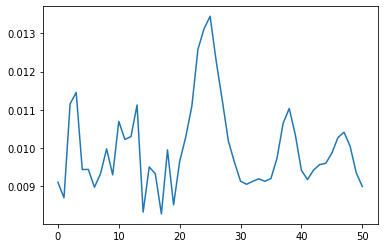

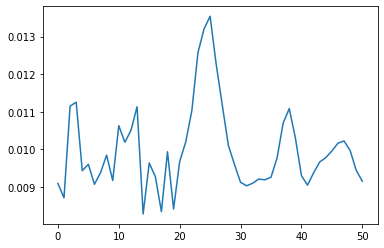

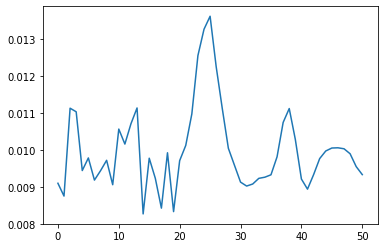

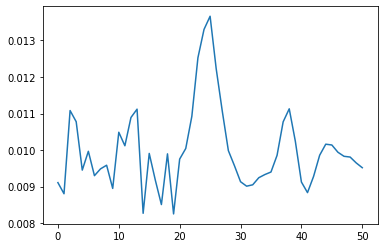

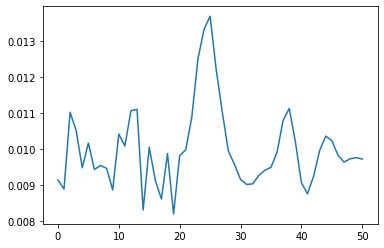

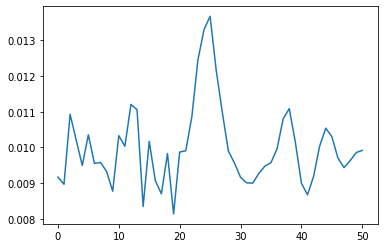

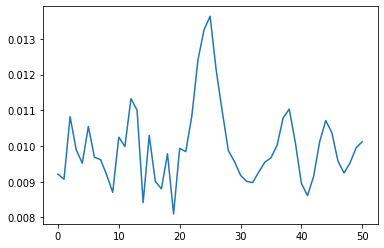

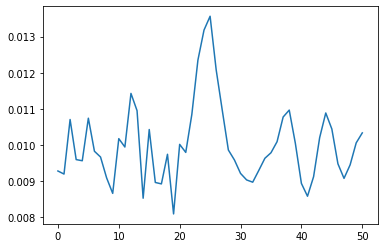

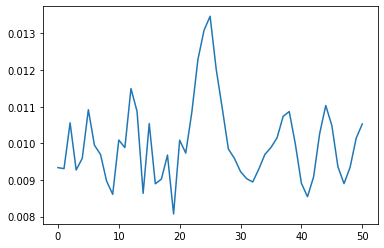

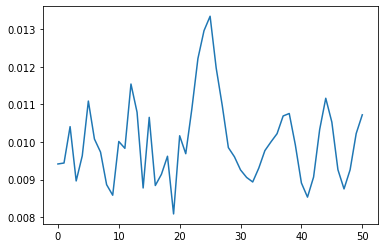

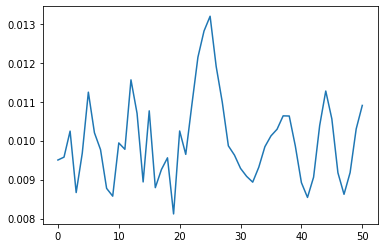

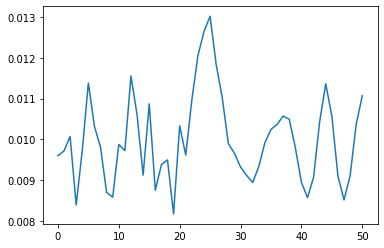

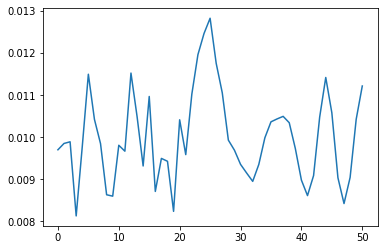

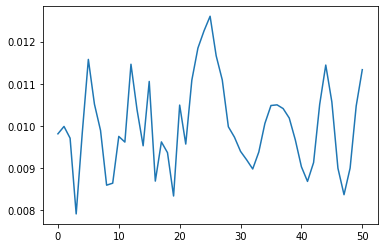

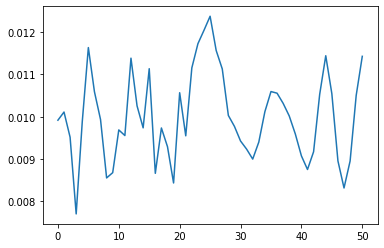

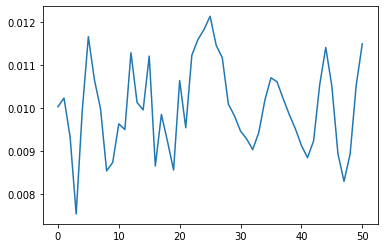

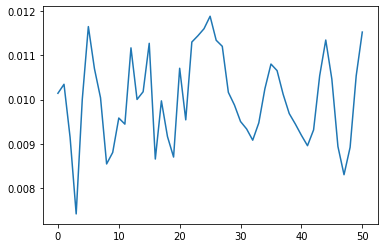

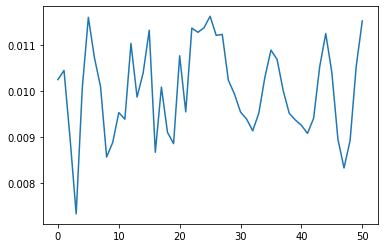

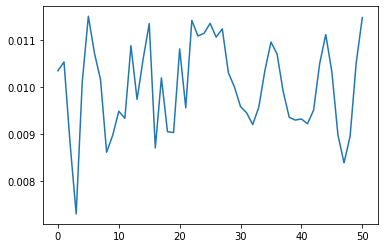

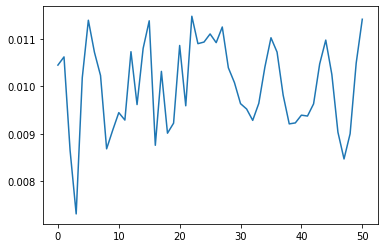

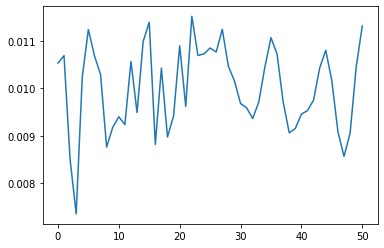

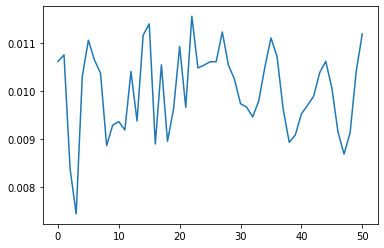

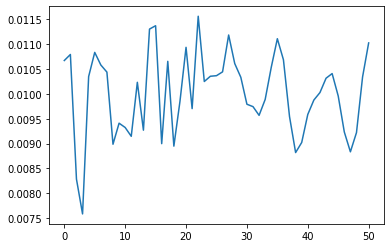

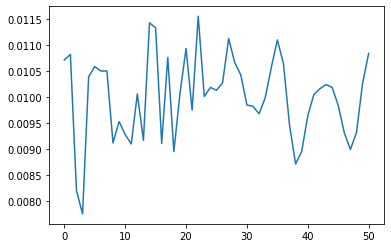

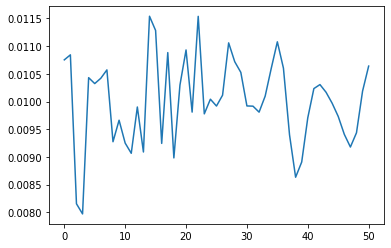

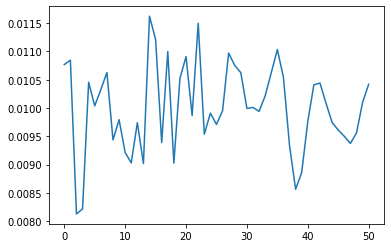

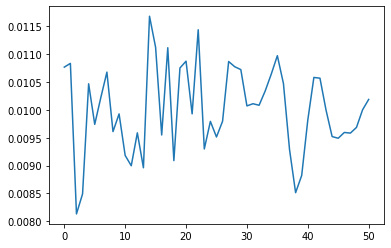

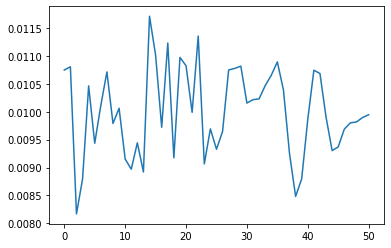

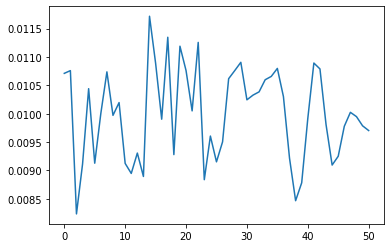

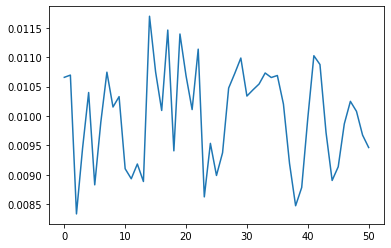

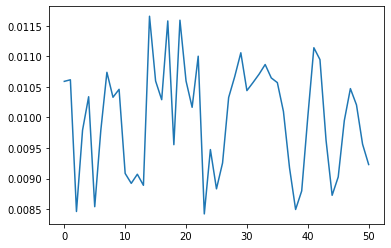

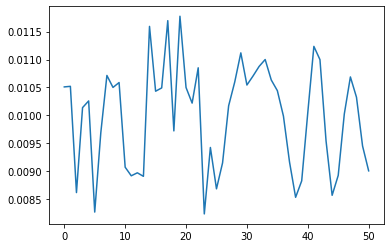

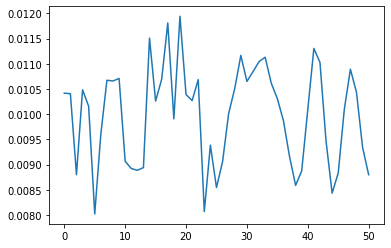

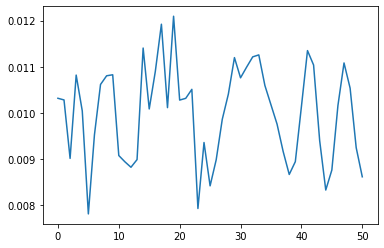

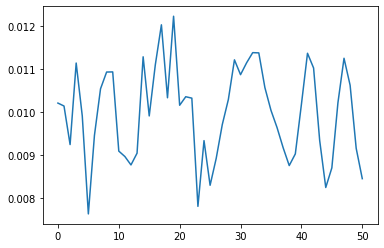

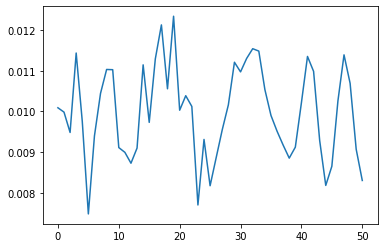

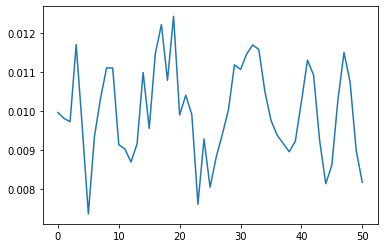

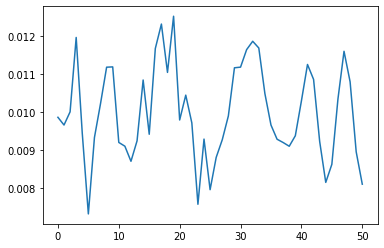

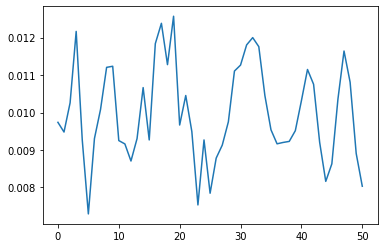

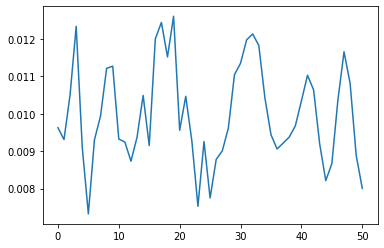

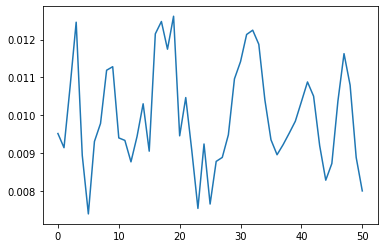

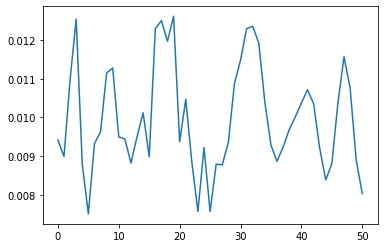

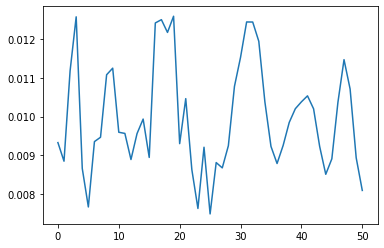

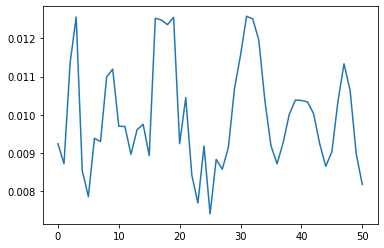

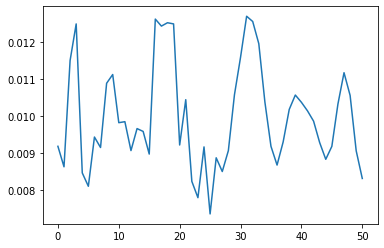

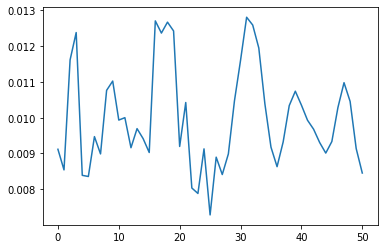

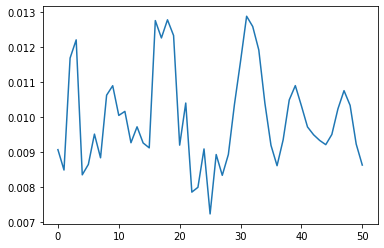

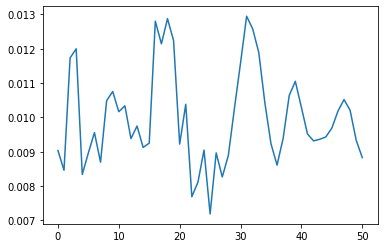

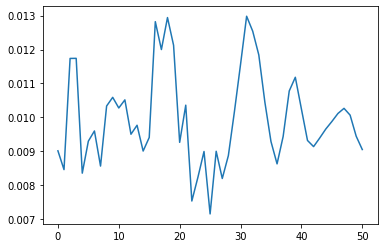

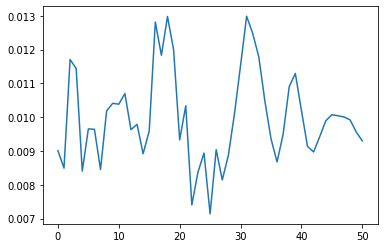

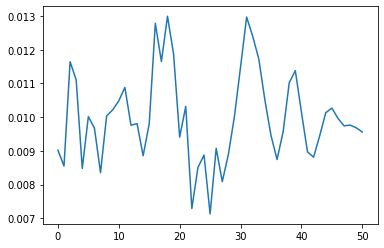

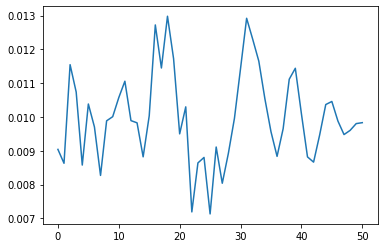

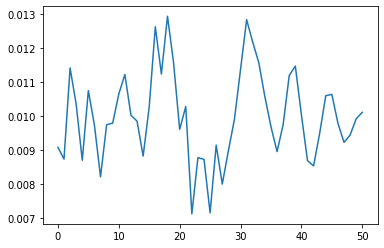

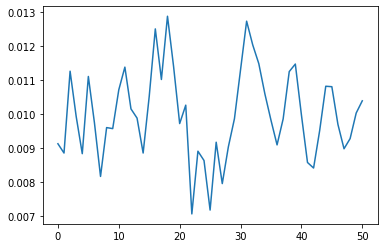

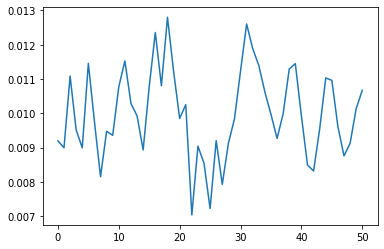

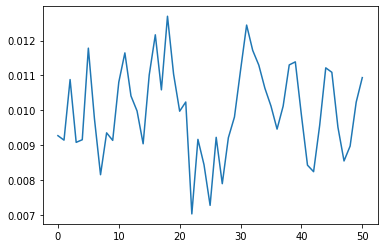

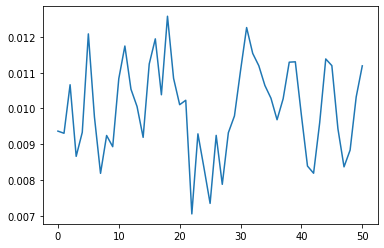

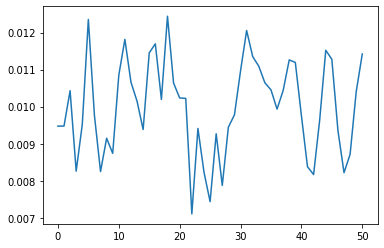

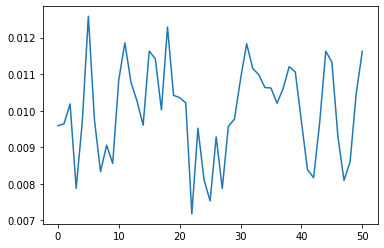

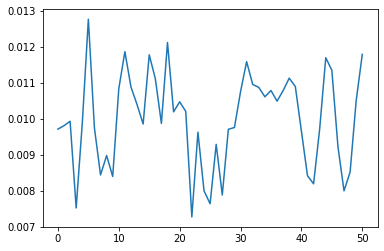

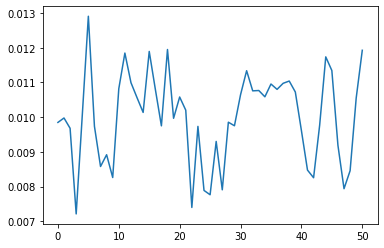

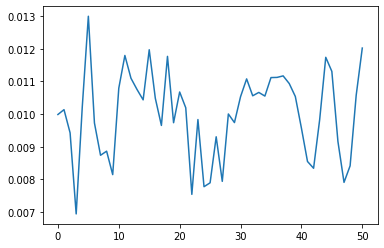

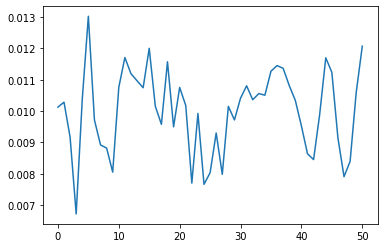

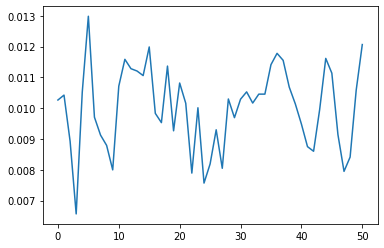

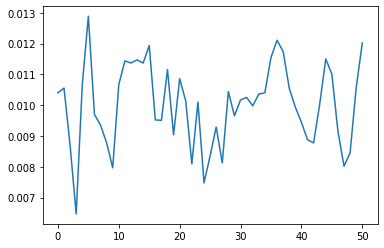

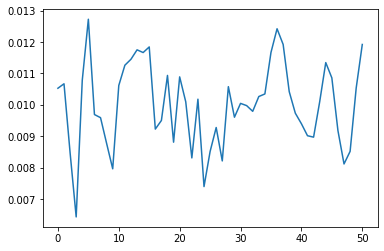

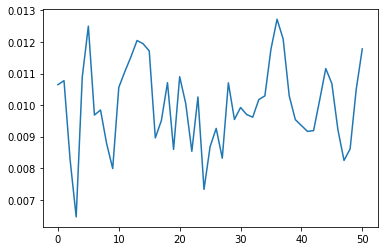

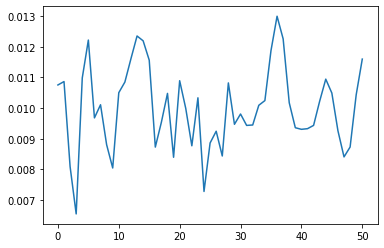

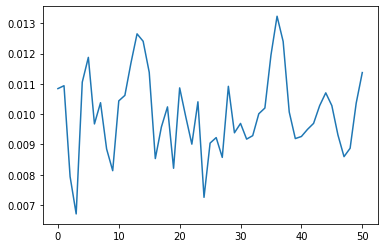

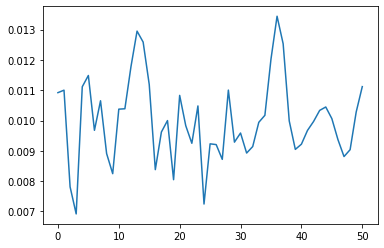

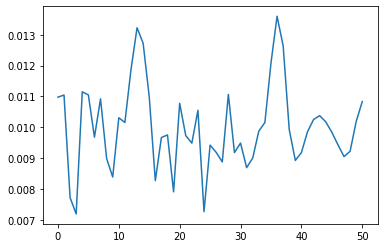

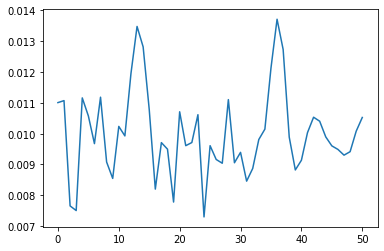

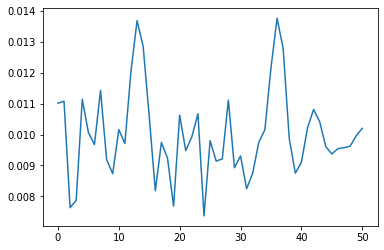

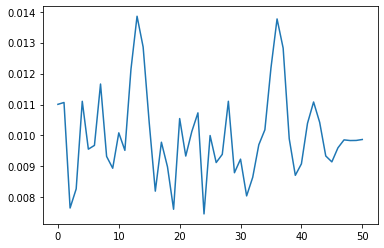

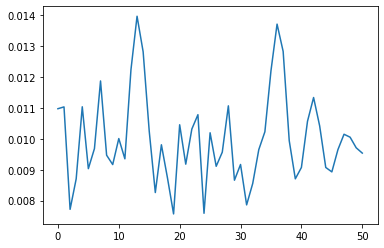

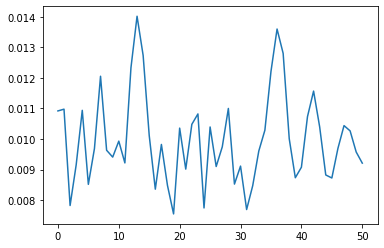

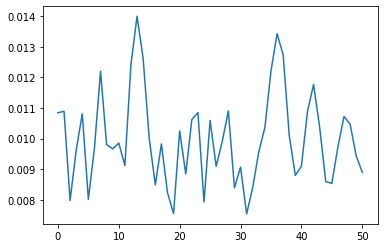

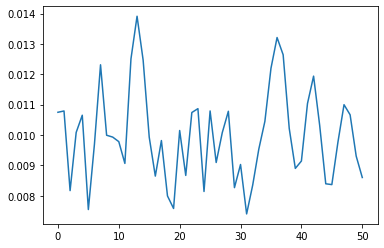

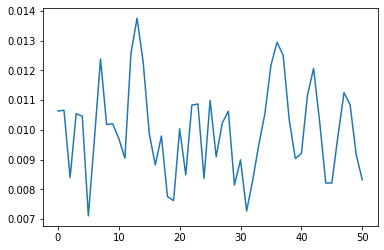

In [59]:

from numpy import arange, pi, sin
from pylab import clf, plot, xlim, ylim, show, pause

for i in range(len(eta_list)):
    clf()# clear the plot
    plt.plot(eta_list[i])# plot the current sin curve
    #plt.ylim([H-A, H+A])# and the y boundaries
    pause(0.01)#pause to allow a smooth animation

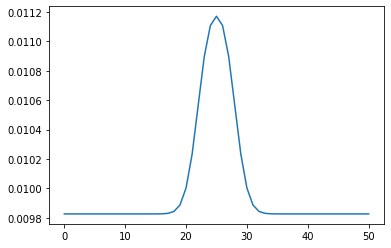

In [57]:
plt.plot(eta_list[0])